# p p pi pi

### imports

In [2]:
%reset -f
import numpy as np
#import cupy as cp
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy.lib import recfunctions as rfn
import time
import matplotlib.gridspec as gridspec
%matplotlib inline
#%matplotlib widget
%matplotlib notebook
pd.options.display.float_format = '{:.4f}'.format

np.set_printoptions(precision=4, suppress=True)

np.finfo('float16')

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [3]:
# Importing bhabha csv files.
digiParNames=['run','event','trackId','gid','layer','cell','time','charge','turnid']
digiParDtypes={'run':np.int32,'event':np.uint32,'trackId':np.int16,'gid':np.uint16,\
               'layer':np.uint16,'cell':np.uint16,'time':np.float32,'charge':np.float32, \
               'turnid':np.uint16}

mcParNames=['run','event','trackId','pdg','px','py','pz','x','y','z','time','turn']
mcParDtypes={'run':np.int32,'event':np.uint32,'trackId':np.int16,'pdg':np.int16,\
             'px':np.float32,'py':np.float32,'pz':np.float32,'x':np.float32,'y':np.float32,\
             'z':np.float32,'time':np.float32,'turn':np.uint16}

In [4]:
# Wires at each layer
import math
wires = np.array([40, 44, 48, 56, 64, 72, 80, 80, 76, 76, 88, 88, 100, 100, 112, 112, 128, 128, 140, 140, \
                 160, 160, 160, 160, 176, 176, 176, 176, 208, 208, 208, 208, 240, 240, 240, 240, \
                  256, 256, 256, 256, 288, 288, 288])

# gid
def gidf(layer, cell):
    return wires[0:layer].sum() + cell

def anglef(layer, cell):
    return ((360 * cell) / (wires[layer] * 9))

# The diameter of the wires are about 12 mm. First layer is in 71mm radius of the center.
# 1st tube radius: about 70mm to 170mm, 1st gap: 167mm to 191mm
# 2nd tube radius: about 170mm to 380mm, 2nd gap: 379mm to 393mm
# 3rd and 4th gap: about 12mm
# radius of the last layer: about 760mm

In [5]:
anglef(10,87)

39.54545454545455

In [6]:
gidf(36,138)

5046

In [7]:
wires.sum()

6796

In [8]:
!nvidia-smi
print('\n')

!nvcc --version
print('\n')

!modinfo nvidia
print('\n')

import torch
print('\n', 'torch version:', torch.__version__)
print('\n', 'cuda version:', torch.version.cuda)
print('\n', 'is cuda available:', torch.cuda.is_available())
#print('\n', 'CUDNN VERSION:', torch.backends.cudnn.version())
print('\n', 'Number CUDA Devices:', torch.cuda.device_count())
print('\n', 'CUDA Device Name:', torch.cuda.get_device_name(device=None))
print('\n', 'CUDA Device Total Memory [GB]:', torch.cuda.get_device_properties(device=None).total_memory/1e9)
print(
'\n', 'Device capability:', torch.cuda.get_device_capability(device=None), \
'\n\n', 'Cuda deviice:', torch.cuda.device(device=None), \
'\n\n', 'Is cuda initialized:', torch.cuda.is_initialized(), \
 )

from torch.utils.cpp_extension import CUDA_HOME
print('\n', 'CUDA_HOME:', CUDA_HOME)

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Mar_21_19:15:46_PDT_2021
Cuda compilation tools, release 11.3, V11.3.58
Build cuda_11.3.r11.3/compiler.29745058_0


filename:       /lib/modules/3.10.0-1127.8.2.el7.x86_64/extra/nvidia.ko.xz
alias:          char-major-195-*
version:        450.51.05
supported:      external
license:        NVIDIA
retpoline:      Y
rhelversion:    7.8
srcversion:     EAC48A690FFFFCEEFF53536
alias:          pci:v000010DEd*sv*sd*bc03sc02i00*
alias:          pci:v000010DEd*sv*sd*bc03sc00i00*
depends:        
vermagic:       3.10.0-1127.8.2.el7.x86_64 SMP mod_unload modversions 
parm:           NvSwitchRegDwords:NvSwitch regkey (charp)
parm:           NvSwitchBlacklist:NvSwitchBlacklist=uuid[,uuid...] (charp)
parm:           nv_cap_enable_devfs:nv_cap_enable_devfs=0 or 1

RuntimeError: No CUDA GPUs are available

In [9]:
import torch
#device = torch.device('cuda')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

### 20000 event Data sample

In [ ]:
# Importing j-psi decay to pppipi csv files.
digimu = pd.DataFrame()
digimuwithback = pd.DataFrame()
digimut0withback = pd.DataFrame()

mcmu = pd.DataFrame()
mcmuwithback = pd.DataFrame()
mcmut0withback = pd.DataFrame()

from google.colab import drive
drive.mount('/content/drive')

# 100000 mu mu events with background and with the use of t0dummy algorithm
digi_pppipi_20000_nonoise = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bhabha-files/digi_pppipi_nonoise_5_0.csv',header=0,sep=',',names=digiParNames,dtype=digiParDtypes)
mc_pppipi_20000_nonoise = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bhabha-files/mc_pppipi_nonoise_5_0.csv',header=0,sep=',',names=mcParNames,dtype=mcParDtypes)

digi_pppipi_20000 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bhabha-files/digi_pppipi_5_0.csv',header=0,sep=',',names=digiParNames,dtype=digiParDtypes)
mc_pppipi_20000 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bhabha-files/mc_pppipi_5_0.csv',header=0,sep=',',names=mcParNames,dtype=mcParDtypes)

digi_pppipi_2000 = digi_pppipi_20000
mc_pppipi_2000 = mc_pppipi_20000

Mounted at /content/drive


In [ ]:
digi_pppipi_2000

,run,event,trackId,gid,layer,cell,time,charge,turnid
0,-8093,0,1007,19,0,19,60.7520,2276.0000,0
1,-8093,0,7,62,1,22,151.2440,502.0000,0
2,-8093,0,7,107,2,23,15.3386,578.0000,0
3,-8093,0,7,159,3,27,70.7447,1462.0000,0
4,-8093,0,1007,215,4,27,171.7800,1548.0000,0
...,...,...,...,...,...,...,...,...,...
5307522,-8093,19999,-1000,3235,28,119,913.3350,0.0000,0
5307523,-8093,19999,-1000,31,0,31,270.0220,0.0000,0
5307524,-8093,19999,-1000,32,0,32,266.3770,0.0000,0
5307525,-8093,19999,-1000,33,0,33,206.8830,0.0000,0


In [ ]:
digi_pppipi_20000_nonoise

,run,event,trackId,gid,layer,cell,time,charge,turnid
0,-8093,0,7,19,0,19,60.7520,2276.0000,0
1,-8093,0,7,62,1,22,151.2440,502.0000,0
2,-8093,0,7,107,2,23,15.3386,578.0000,0
3,-8093,0,7,159,3,27,70.7447,1462.0000,0
4,-8093,0,7,215,4,27,171.7800,1548.0000,0
...,...,...,...,...,...,...,...,...,...
4659522,-8093,19999,9,5197,37,33,258.6800,243.0000,0
4659523,-8093,19999,9,5196,37,32,298.8510,944.0000,0
4659524,-8093,19999,9,5451,38,31,305.6520,533.0000,0
4659525,-8093,19999,9,5450,38,30,284.5440,699.0000,0


In [ ]:
dfnr_low = digi_pppipi_2000.copy()
dfnr_low = dfnr_low.sort_values('time').drop_duplicates(subset = ['event', 'gid'], keep = 'first')
dfnr_low = dfnr_low.sort_values(by=['event', 'trackId', 'gid']).drop(['run', 'turnid'], axis=1)
dfnr_low

,event,trackId,gid,layer,cell,time,charge
251,0,-1000,589,9,29,374.8580,0.0000
252,0,-1000,3060,27,120,185.0960,0.0000
253,0,-1000,5553,38,133,484.1020,0.0000
149,0,-990,2941,27,1,160.9520,2651.0000
1,0,7,62,1,22,151.2440,502.0000
...,...,...,...,...,...,...,...
5307430,19999,1009,5540,38,120,79.6868,1318.0000
5307449,19999,1009,6031,40,99,392.9050,353.0000
5307306,19999,1012,864,12,52,982.4520,424.0000
5307304,19999,1012,1069,14,57,912.0700,516.0000


In [ ]:
dfnr_nonoise = digi_pppipi_20000_nonoise.copy()
dfnr_nonoise = dfnr_nonoise.sort_values('time').drop_duplicates(subset = ['event', 'gid'], keep = 'first')
dfnr_nonoise = dfnr_nonoise.sort_values(by=['event', 'trackId', 'gid']).drop(['run', 'turnid'], axis=1)
dfnr_nonoise

,event,trackId,gid,layer,cell,time,charge
0,0,7,19,0,19,60.7520,2276.0000
1,0,7,62,1,22,151.2440,502.0000
2,0,7,107,2,23,15.3386,578.0000
3,0,7,159,3,27,70.7447,1462.0000
4,0,7,215,4,27,171.7800,1548.0000
...,...,...,...,...,...,...,...
4659310,19999,12,1186,15,62,846.4480,1067.0000
4659311,19999,12,1187,15,63,847.2240,500.0000
4659312,19999,12,1188,15,64,747.1150,743.0000
4659313,19999,12,1189,15,65,676.1760,649.0000


In [ ]:
# TrackIds after background mixing, their frequency, and the average of properties.
print('\n\naverage values when grouped by trackId')
df_low = dfnr_low.drop('event', axis=1)
dfmean = df_low.groupby('trackId').mean()
dfmean['frequency'] = df_low.groupby('trackId').size()
dfmean



average values when grouped by trackId


,gid,layer,cell,time,charge,frequency
trackId,,,,,,
-1000,1462.7978,13.5415,56.7728,544.8920,0.0000,691597
-993,1464.7277,14.1162,60.5216,157.0195,857.9446,1825
-992,1320.3165,12.9299,54.1734,151.0391,792.6985,2139
-991,1399.9368,13.5108,56.2577,142.3511,1875.4749,2169
-990,1756.6759,16.0010,65.4201,179.1320,2862.9988,4020
-989,1749.2233,16.5260,62.1165,173.4469,2747.8042,1348
-988,1977.8382,17.5956,60.3971,156.5862,1399.0662,136
-987,744.7872,8.6915,42.7447,395.5741,717.5745,94
-986,313.7500,3.8929,35.0357,406.3135,575.5714,28


In [ ]:
# TrackIds after background mixing, their frequency, and the average of properties.
print('\n\naverage values when grouped by trackId')
df_nonoise = dfnr_nonoise.drop('event', axis=1)
dfmean_nonoise = dfnr_nonoise.groupby('trackId').mean()
dfmean_nonoise['frequency'] = df_nonoise.groupby('trackId').size()
dfmean_nonoise



average values when grouped by trackId


,event,gid,layer,cell,time,charge,frequency
trackId,,,,,,,
1,11400.1852,2170.6667,19.7037,62.2222,237.4314,44897.2578,27
2,8732.0000,1262.0000,16.0000,26.0000,279.6130,11907.0000,1
6,10005.2857,2585.5888,21.8678,80.4672,187.0116,849.5018,698451
7,9980.0837,2573.2062,21.7822,80.8128,186.4851,936.3017,871519
8,9990.9601,2520.1328,21.4222,79.1340,177.7395,1906.9995,810527
9,9923.2755,2976.9410,24.2737,88.9353,198.7643,2451.8472,1695293
10,10035.1698,3017.9601,24.5954,89.5829,201.9560,2288.4600,475891
11,9875.8814,2937.1200,24.2408,87.7358,206.9187,2365.9075,72380
12,9977.9630,2321.5085,20.3774,74.7534,462.2169,1226.5739,16965


In [ ]:
print(dfmean_nonoise['frequency'], dfmean['frequency'])

trackId
1          27
2           1
6      698451
7      871519
8      810527
9     1695293
10     475891
11      72380
12      16965
13       4603
14       1082
15       8335
16       4039
17        387
18         26
19          1
Name: frequency, dtype: int64 trackId
-1000     691597
-993        1825
-992        2139
-991        2169
-990        4020
-989        1348
-988         136
-987          94
-986          28
-985           5
-984          23
-983          12
 1            26
 2             1
 6        577189
 7        720098
 8        668010
 9       1415511
 10       398011
 11        60108
 12        13699
 13         3723
 14          879
 15         6902
 16         3608
 17          310
 18           23
 1001          1
 1006     112353
 1007     140358
 1008     131869
 1009     261464
 1010      72636
 1011      11529
 1012       2993
 1013        814
 1014        181
 1015       1356
 1016        398
 1017         77
 1018          3
 1019          1
Name: frequency,

In [ ]:
# Positive trackIds (1000:1003) are for replaced hits and negative ones (-996:-1000) are added hits.
# To train the neural network, we consider (1000) as signal hits since they are exactly 
# the same hits, just with a different id.
# Negative indexes other than -1000 and -999 are also negligible.
# Hence, the followings are signal and background hit sets. Other trackIds are negligible.
'''dfbaclow = dfnr_low[(dfnr_low.trackId == -1000) | (dfnr_low.trackId == 1006) | (dfnr_low.trackId == 1007)\
                    | (dfnr_low.trackId == 1009) | (dfnr_low.trackId == 1010) | (dfnr_low.trackId == 1011)]
dfsiglow = dfnr_low[(dfnr_low.trackId == 6) | (dfnr_low.trackId == 7) | (dfnr_low.trackId == 8) \
                    | (dfnr_low.trackId == 9) | (dfnr_low.trackId == 10) | (dfnr_low.trackId == 11)]'''

dfbaclow = dfnr_low[(dfnr_low.trackId == 1000)\
                    | (dfnr_low.trackId == -1000)]# | (dfnr_low.trackId == 1010) | (dfnr_low.trackId == 1011)]
dfsiglow = dfnr_low[(dfnr_low.trackId == 1) | (dfnr_low.trackId == 0) | (dfnr_low.trackId == 6) | (dfnr_low.trackId == 7) | (dfnr_low.trackId == 8) \
                    | (dfnr_low.trackId == 9) | (dfnr_low.trackId == 10) | (dfnr_low.trackId == 11) | (dfnr_low.trackId == 1006) | (dfnr_low.trackId == 1007) | (dfnr_low.trackId == 1008) \
                    | (dfnr_low.trackId == 1009) | (dfnr_low.trackId == 1010) | (dfnr_low.trackId == 1011)]

dfsigalotnoise = dfnr_low[(dfnr_low.trackId == 1) | (dfnr_low.trackId == 0) | (dfnr_low.trackId == 6) | (dfnr_low.trackId == 7) | (dfnr_low.trackId == 8) \
                    | (dfnr_low.trackId == 9) | (dfnr_low.trackId == 10) | (dfnr_low.trackId == 11)]
dfbacalotnoise = dfnr_low[(dfnr_low.trackId == 1000) | (dfnr_low.trackId == -1000) | (dfnr_low.trackId == 1006) | (dfnr_low.trackId == 1007) | (dfnr_low.trackId == 1008) \
                    | (dfnr_low.trackId == 1009) | (dfnr_low.trackId == 1010) | (dfnr_low.trackId == 1011)]

dfsiglow['angle'] = (6.283 / wires[dfsiglow['layer']]) * dfsiglow['cell']
dfbaclow['angle'] = (6.283 / wires[dfbaclow['layer']]) * dfbaclow['cell']

dfsigalotnoise['angle'] = (6.283 / wires[dfsigalotnoise['layer']]) * dfsigalotnoise['cell']
dfbacalotnoise['angle'] = (6.283 / wires[dfbacalotnoise['layer']]) * dfbacalotnoise['cell']

dfsignonoise = dfnr_nonoise

dfsignonoise['angle'] = (6.283 / wires[dfsignonoise['layer']]) * dfsignonoise['cell']


print(dfsiglow)
print(dfbaclow)
print(dfsignonoise)

         event  trackId   gid  layer  cell   time  charge  angle
1            0        7    62      1    22 151.24  502.00   3.14
2            0        7   107      2    23  15.34  578.00   3.01
3            0        7   159      3    27  70.74 1462.00   3.03
5            0        7   216      4    28 524.09  898.00   2.75
6            0        7   284      5    32  38.43  723.00   2.79
...        ...      ...   ...    ...   ...    ...     ...    ...
5307474  19999     1009  5483     38    63 135.92  314.00   1.55
5307472  19999     1009  5485     38    65  65.74  400.00   1.60
5307465  19999     1009  5492     38    72 313.91  582.00   1.77
5307430  19999     1009  5540     38   120  79.69 1318.00   2.95
5307449  19999     1009  6031     40    99 392.90  353.00   2.16

[4569162 rows x 8 columns]
         event  trackId   gid  layer  cell    time  charge  angle
251          0    -1000   589      9    29  374.86    0.00   2.40
252          0    -1000  3060     27   120  185.10    0.00  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
mc_pppipi_2000

,run,event,trackId,pdg,px,py,pz,x,y,z,time,turn
0,-8093,0,7,211,-0.1058,0.0448,0.0988,0.0311,-0.1538,-0.7819,647.9710,0
1,-8093,0,8,-211,-0.4768,0.2214,0.0852,0.0311,-0.1538,-0.7819,647.9710,0
2,-8093,0,9,2212,0.3234,0.0114,-0.6824,0.0311,-0.1538,-0.7819,647.9710,0
3,-8093,0,10,-2212,0.2933,-0.2777,0.4970,0.0311,-0.1538,-0.7819,647.9710,0
4,-8093,0,12,14,-0.0252,-0.0104,0.0121,-10.5244,-73.2570,126.2410,725.9840,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82498,-8093,19999,7,-211,0.4758,-0.2843,0.5784,0.0430,-0.1546,-0.2612,647.9750,0
82499,-8093,19999,8,2212,0.0334,0.2319,-0.2728,0.0430,-0.1546,-0.2612,647.9750,0
82500,-8093,19999,9,-2212,-0.5331,-0.0074,-0.2586,0.0430,-0.1546,-0.2612,647.9750,0
82501,-8093,19999,11,14,-0.0081,0.0272,0.0091,-28.0892,-2.9953,-81.3624,677.2300,0


In [ ]:
mc_pppipi_20000_nonoise

,run,event,trackId,pdg,px,py,pz,x,y,z,time,turn
0,-8093,0,7,211,-0.1058,0.0448,0.0988,0.0311,-0.1538,-0.7819,647.9710,0
1,-8093,0,8,-211,-0.4768,0.2214,0.0852,0.0311,-0.1538,-0.7819,647.9710,0
2,-8093,0,9,2212,0.3234,0.0114,-0.6824,0.0311,-0.1538,-0.7819,647.9710,0
3,-8093,0,10,-2212,0.2933,-0.2777,0.4970,0.0311,-0.1538,-0.7819,647.9710,0
4,-8093,0,12,14,-0.0252,-0.0104,0.0121,-10.5244,-73.2570,126.2410,725.9840,0
...,...,...,...,...,...,...,...,...,...,...,...,...
83176,-8093,19999,7,-211,0.4758,-0.2843,0.5784,0.0430,-0.1546,-0.2612,647.9750,0
83177,-8093,19999,8,2212,0.0334,0.2319,-0.2728,0.0430,-0.1546,-0.2612,647.9750,0
83178,-8093,19999,9,-2212,-0.5331,-0.0074,-0.2586,0.0430,-0.1546,-0.2612,647.9750,0
83179,-8093,19999,11,14,-0.0081,0.0272,0.0091,-28.0892,-2.9953,-81.3624,677.2300,0


In [ ]:
mc_pppipi_2000[mc_pppipi_2000.event == 2]

,run,event,trackId,pdg,px,py,pz,x,y,z,time,turn
9,-8093,2,6,211,-0.1844,0.1495,-0.4680,0.0119,-0.1550,-0.1301,664.0730,0
10,-8093,2,7,-211,0.3078,0.0236,0.3452,0.0119,-0.1550,-0.1301,664.0730,0
11,-8093,2,8,2212,0.1728,0.2281,0.2419,0.0119,-0.1550,-0.1301,664.0730,0
12,-8093,2,9,-2212,-0.2622,-0.4012,-0.1181,0.0119,-0.1550,-0.1301,664.0730,0


In [ ]:
dfnrmc = mc_pppipi_2000.copy()
print('\n\naverage values when grouped by pgd')
dfmc = dfnrmc.drop(['event', 'run'], axis=1)
dfmeanmc = dfmc.groupby('pdg').mean()
dfmeanmc['frequency'] = dfmc.groupby('pdg').size()
dfmeanmc



average values when grouped by pgd


,trackId,px,py,pz,x,y,z,time,turn,frequency
pdg,,,,,,,,,,
-2212,9.2547,0.0135,-0.0048,0.0001,0.0317,-0.1548,0.0688,655.9087,0.0000,19497
-211,7.2546,0.0066,0.0007,-0.0021,0.0318,-0.1548,0.0688,655.9073,0.0000,18934
-22,10.4286,0.0282,0.0114,0.0055,0.0199,-0.1551,-0.0681,658.2696,0.0000,7
-14,13.3633,-0.0013,0.0023,-0.0003,-0.3534,-2.0201,-2.7715,1654.8152,0.0000,947
-13,10.3011,-0.0013,0.0019,0.0069,0.2223,-0.2596,0.7518,659.3416,0.0000,1136
-11,12.3287,0.0000,-0.0002,0.0006,-0.6262,-1.8360,2.6453,1315.8503,0.0000,356
11,17.0000,0.0071,-0.0008,0.0063,-31.0407,20.9699,52.3300,654.3840,0.0000,1
13,11.7153,-0.0000,-0.0044,-0.0019,0.1665,-2.3001,-1.0481,658.7409,0.0000,1180
14,11.2607,0.0006,0.0004,-0.0004,0.5097,1.9573,0.9706,684.2034,0.0000,3046


(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17490., 13157., 11883., 10243.,  8377.,  6538.,  4960.,
         3554.,  2566.,  1677.,  1047.,   541.,   328.,   110.,    29.,
            3.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([-3.  , -2.88, -2.76, -2.64, -2.52, -2.4 , -2.28, -2.16, -2.04,
        -1.92, -1.8 , -1.68, -1.56, -1.44, -1.32, -1.2 , -1.08, -0.96,
        -0.84, -0.72, -0.6 , -0.48, -0.36, -0.24, -0.12,  0.  ,  0.12,
         0.24,  0.36,  0.48,  0.6 ,  0.72,  0.84,  0.96,  1.08,  1.2 ,
         1.32,  1.44,  1.56,  1.68,  1.8 ,  1.92,  2.04,  2.16,  2.28,
         2.4 ,  2.52,  2.64,  2.76,  2.88,  3.  ], dtype=float32),
 <a list of 50 Patch objects>)

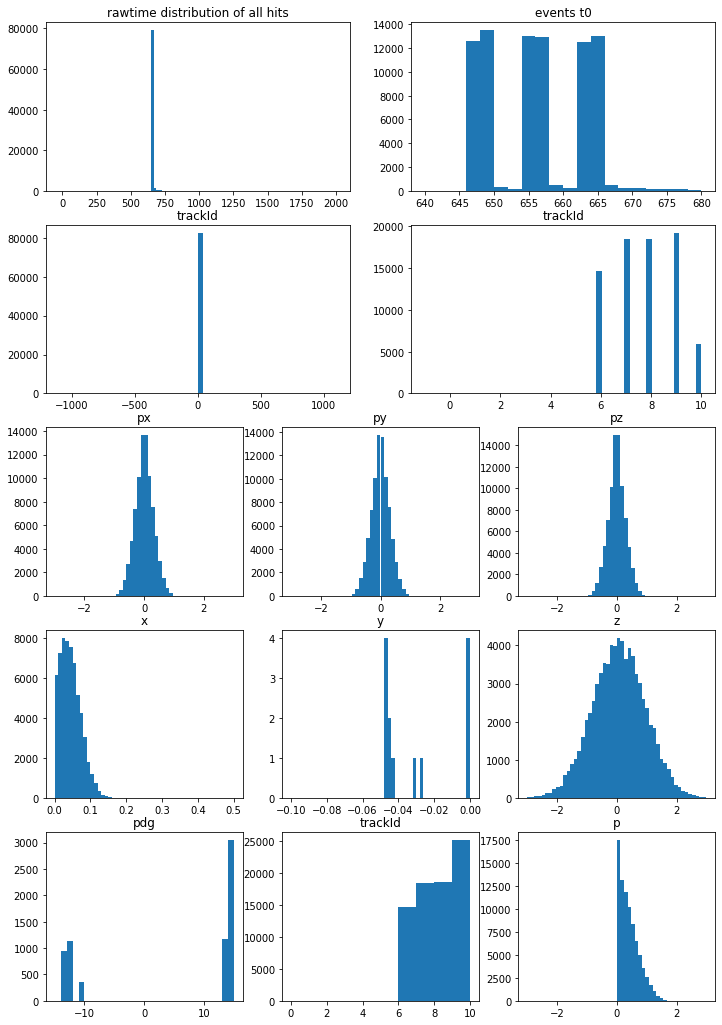

In [ ]:
%matplotlib inline
plt.subplots(figsize=(12, 18))
plt.subplot(5, 2, 1)
plt.title('rawtime distribution of all hits')
plt.hist(mc_pppipi_2000['time'],\
         bins = 100, range=[-20, 2000])

plt.subplot(5, 2, 2)
plt.title('events t0')
plt.hist(mc_pppipi_2000['time'],\
         bins = 20, range=[640, 680])

plt.subplot(5, 2, 3)
plt.title('trackId')
plt.hist(mc_pppipi_2000['trackId'],\
         bins = 50, range=[-1100, 1100])

plt.subplot(5, 2, 4)
plt.title('trackId')
plt.hist(mc_pppipi_2000['trackId'],\
         bins = 50, range=[-1, 10])

'''plt.subplot(5, 2, 5)
plt.title('charge')
plt.hist(mc_pppipi_2000['charge'],\
         bins = 50, range=[-1100, 1100])'''

plt.subplot(537)
plt.title('px')
plt.hist(mc_pppipi_2000['px'],\
         bins = 50, range=[-3, 3])

plt.subplot(538)
plt.title('py')
plt.hist(mc_pppipi_2000['py'],\
         bins = 50, range=[-3, 3])

plt.subplot(539)
plt.title('pz')
plt.hist(mc_pppipi_2000['pz'],\
         bins = 50, range=[-3, 3])

plt.subplot(5, 3, 10)
plt.title('x')
plt.hist(mc_pppipi_2000['x'],\
         bins = 50, range=[0, 0.5])

plt.subplot(5, 3, 11)
plt.title('y')
plt.hist(mc_pppipi_2000['y'],\
         bins = 50, range=[-0.1, 0])

plt.subplot(5, 3, 12)
plt.title('z')
plt.hist(mc_pppipi_2000['z'],\
         bins = 50, range=[-3, 3])

plt.subplot(5, 3, 13)
plt.title('pdg')
plt.hist(mc_pppipi_2000['pdg'],\
         bins = 30, range=[-15, 15])

plt.subplot(5, 3, 14)
plt.title('trackId')
plt.hist(mc_pppipi_2000['trackId'], bins=10, range=[0, 10])

mc_pppipi_2000['p'] = (mc_pppipi_2000['px']**2 + mc_pppipi_2000['px']**2 + mc_pppipi_2000['px']**2)**0.5
plt.subplot(5, 3, 15)
plt.title('p')
plt.hist(mc_pppipi_2000['p'], bins = 50, range=[-3, 3])

In [ ]:
dfsiglow.groupby('event').size().reset_index()

,event,0
0,0,249
1,1,196
2,2,213
3,3,266
4,4,185
...,...,...
19993,19995,144
19994,19996,368
19995,19997,397
19996,19998,276


In [ ]:
dfbaclow.groupby('event').size().reset_index()

,event,0
0,0,3
1,1,92
2,2,20
3,3,25
4,4,13
...,...,...
19754,19995,38
19755,19996,32
19756,19997,6
19757,19998,172


In [ ]:
'''setadiff = dfbaclow.groupby('event').size().reset_index().event.values
setbdiff = np.arange(0, 1000).astype(np.uint64)
nonoiselow = np.setdiff1d(setbdiff, setadiff)
dfnonoiselow = pd.DataFrame(np.zeros(shape=(len(nonoiselow), 1)))
dfnonoiselow['event'] = nonoiselow
dfnonoiselow'''

"setadiff = dfbaclow.groupby('event').size().reset_index().event.values\nsetbdiff = np.arange(0, 1000).astype(np.uint64)\nnonoiselow = np.setdiff1d(setbdiff, setadiff)\ndfnonoiselow = pd.DataFrame(np.zeros(shape=(len(nonoiselow), 1)))\ndfnonoiselow['event'] = nonoiselow\ndfnonoiselow"

In [ ]:
'''dfbaclowall = dfbaclow.groupby('event').size().reset_index().append(dfnonoiselow, ignore_index=True).sort_values('event')
dfbaclowall = dfbaclowall.reset_index().drop(['index'], axis=1)
dfbaclowall'''

"dfbaclowall = dfbaclow.groupby('event').size().reset_index().append(dfnonoiselow, ignore_index=True).sort_values('event')\ndfbaclowall = dfbaclowall.reset_index().drop(['index'], axis=1)\ndfbaclowall"

In [ ]:
'''hitnumberslow = pd.DataFrame(np.zeros(shape=(1000, 2)))
hitnumberslow[0] = dfsiglow.groupby('event').size().reset_index()[0]
hitnumberslow[1] = dfbaclowall[0]
hitnumberslow'''

"hitnumberslow = pd.DataFrame(np.zeros(shape=(1000, 2)))\nhitnumberslow[0] = dfsiglow.groupby('event').size().reset_index()[0]\nhitnumberslow[1] = dfbaclowall[0]\nhitnumberslow"

In [ ]:
#average of signal hits
'hitnumberslow[0].mean()'

'hitnumberslow[0].mean()'

In [ ]:
#average of noise hits
'hitnumberslow[1].mean()'

'hitnumberslow[1].mean()'

In [ ]:
'''plt.subplots(figsize=(6, 5))
plt.subplot(111)
plt.plot(hitnumberslow[0][0:2000], hitnumberslow[1][0:2000], 'b.', markersize=5, alpha=0.1)
plt.xlim(0, 600)
plt.ylim(0, 600)
plt.xlabel('number of signal hits', fontsize=16)
plt.ylabel('number of background hits', fontsize=16)
plt.title('distribution of the number of hits in each event', fontsize=12)
plt.tick_params(length=6, width=2, labelsize=12)'''

"plt.subplots(figsize=(6, 5))\nplt.subplot(111)\nplt.plot(hitnumberslow[0][0:2000], hitnumberslow[1][0:2000], 'b.', markersize=5, alpha=0.1)\nplt.xlim(0, 600)\nplt.ylim(0, 600)\nplt.xlabel('number of signal hits', fontsize=16)\nplt.ylabel('number of background hits', fontsize=16)\nplt.title('distribution of the number of hits in each event', fontsize=12)\nplt.tick_params(length=6, width=2, labelsize=12)"

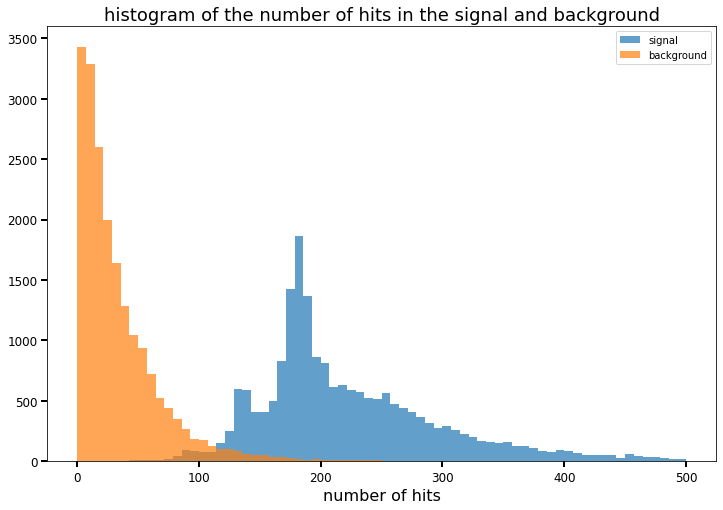

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(dfsiglow.groupby('event').size(),\
         bins = 70, range=[0, 500], alpha=0.7, \
         label = ['signal'])
plt.hist(dfbaclow.groupby('event').size(),\
         bins = 70, range=[0, 500], alpha=0.7, \
         label = ['background'])
plt.legend()
plt.xlabel('number of hits', fontsize=16)
plt.title('histogram of the number of hits in the signal and background', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12)

In [ ]:
# Average of features for background hits
dfbaclow.drop(['event', 'trackId'], axis=1).mean()

gid      1462.7978
layer      13.5415
cell       56.7728
time      544.8920
charge      0.0000
angle       3.0799
dtype: float64

In [ ]:
# Average of features for signal hits
pd.options.display.float_format = '{:.2f}'.format
dfsiglow.drop(['event', 'trackId'], axis=1).mean()

gid      2782.96
layer      23.10
cell       84.82
time      191.40
charge   1811.37
angle       3.12
dtype: float64

In [ ]:
# Database of all the hits which have more noise than signal hits
dfsigbaclow = pd.DataFrame() 
dfsigbaclow['signum'] = dfsiglow.groupby(['event']).size()
dfsigbaclow['bacnum'] = dfbaclow.groupby(['event']).size()
dfsigbaclow['highnoise'] = dfsigbaclow['signum'] < dfsigbaclow['bacnum']
dfsigbaclow['bacnum'] = dfsigbaclow['bacnum'].fillna(0).astype(int)
#dfsigbac80['bacnum'] = dfsigbac80['bacnum']
dfhighnoiselow = dfsigbaclow.loc[(dfsigbaclow.highnoise == 1)].reset_index()
print('\n hits wich have more noise that signal hits:', dfsigbaclow['highnoise'].sum())
dfsigbaclow


 hits wich have more noise that signal hits: 198


,signum,bacnum,highnoise
event,,,
0,249,3,False
1,196,92,False
2,213,20,False
3,266,25,False
4,185,13,False
...,...,...,...
19995,144,38,False
19996,368,32,False
19997,397,6,False


In [ ]:
# Building training set.
'''dflow = dfnr_low[(dfnr_low.trackId == -1000) | (dfnr_low.trackId == 1006) | (dfnr_low.trackId == 1007)\
                    | (dfnr_low.trackId == 1009) | (dfnr_low.trackId == 1010) | (dfnr_low.trackId == 1011)\
                    |(dfnr_low.trackId == 6) | (dfnr_low.trackId == 7) | (dfnr_low.trackId == 8) \
                    | (dfnr_low.trackId == 9) | (dfnr_low.trackId == 10) | (dfnr_low.trackId == 11)]

dflow['hitid'] = np.where((dflow.trackId == -1000) | (dflow.trackId == 1006) | (dflow.trackId == 1007)\
                    | (dflow.trackId == 1009) | (dflow.trackId == 1010) | (dflow.trackId == 1011)\
                          , False, True)'''

dflow = dfnr_low[(dfnr_low.trackId == -1000) | (dfnr_low.trackId == 1000) | (dfnr_low.trackId == 1006) | (dfnr_low.trackId == 1007) | (dfnr_low.trackId == 1008)\
                    | (dfnr_low.trackId == 1009) | (dfnr_low.trackId == 1010) | (dfnr_low.trackId == 1011)\
                    |(dfnr_low.trackId == 6) | (dfnr_low.trackId == 7) | (dfnr_low.trackId == 8) \
                    | (dfnr_low.trackId == 9) | (dfnr_low.trackId == 10) | (dfnr_low.trackId == 11)]

dflow['hitid'] = np.where((dflow.trackId == -1000) | (dflow.trackId == 1000), False, True)

dflow['angleid'] = anglef(dflow['layer'], dflow['cell']).astype(np.uint16)

dflow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,event,trackId,gid,layer,cell,time,charge,hitid,angleid
251,0,-1000,589,9,29,374.86,0.00,False,15
252,0,-1000,3060,27,120,185.10,0.00,False,27
253,0,-1000,5553,38,133,484.10,0.00,False,20
1,0,7,62,1,22,151.24,502.00,True,20
2,0,7,107,2,23,15.34,578.00,True,19
...,...,...,...,...,...,...,...,...,...
5307474,19999,1009,5483,38,63,135.92,314.00,True,9
5307472,19999,1009,5485,38,65,65.74,400.00,True,10
5307465,19999,1009,5492,38,72,313.91,582.00,True,11
5307430,19999,1009,5540,38,120,79.69,1318.00,True,18


In [ ]:
# Let's see if there is any repeated hits (There is none!)
dflow = dflow.sort_values('time').drop_duplicates(subset = ['event', 'gid'], keep = 'first')
dflow = dflow.sort_values(by=['event', 'gid'])
dflow

,event,trackId,gid,layer,cell,time,charge,hitid,angleid
120,0,9,2,0,2,105.73,814.00,True,2
73,0,1008,18,0,18,139.14,390.00,True,18
0,0,1007,19,0,19,60.75,2276.00,True,19
150,0,10,36,0,36,64.08,955.00,True,36
121,0,9,43,1,3,5.22,1986.00,True,2
...,...,...,...,...,...,...,...,...,...
5307437,19999,9,6618,42,110,69.63,486.00,True,15
5307436,19999,9,6619,42,111,168.14,437.00,True,15
5307435,19999,9,6620,42,112,268.65,536.00,True,15
5307434,19999,9,6642,42,134,85.40,1200.00,True,18


In [ ]:
# data frame for presentation
dfpres = dflow.copy()
dfpres['angle'] = (6.283 / wires[dfpres['layer']]) * dfpres['cell']
dfpres = dfpres.reset_index()
dfpres = dfpres.drop(['index'], axis=1)
dfpres['signalid'] = dfpres['hitid']
dfpreslow = dfpres.drop(['hitid'], axis=1)
dfpreslow

,event,trackId,gid,layer,cell,time,charge,angleid,angle,signalid
0,0,-1000,589,9,29,374.86,0.00,15,2.40,False
1,0,-1000,3060,27,120,185.10,0.00,27,4.28,False
2,0,-1000,5553,38,133,484.10,0.00,20,3.26,False
3,0,7,62,1,22,151.24,502.00,20,3.14,True
4,0,7,107,2,23,15.34,578.00,19,3.01,True
...,...,...,...,...,...,...,...,...,...,...
5260728,19999,1009,5483,38,63,135.92,314.00,9,1.55,True
5260729,19999,1009,5485,38,65,65.74,400.00,10,1.60,True
5260730,19999,1009,5492,38,72,313.91,582.00,11,1.77,True
5260731,19999,1009,5540,38,120,79.69,1318.00,18,2.95,True


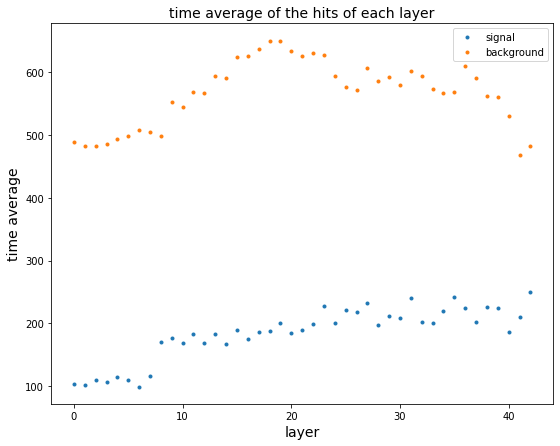

In [ ]:
#time average for hits of each layer
%matplotlib inline
meantimes = np.zeros(43)
meantimeb = np.zeros(43)
for i in range(43):
    meantimes[i] = dfsiglow.loc[dfsiglow.layer==i]['time'].mean()
    meantimeb[i] = dfbaclow.loc[dfbaclow.layer==i]['time'].mean()
plt.figure(figsize=(9,7))
plt.plot(range(43), meantimes, '.', label='signal')
plt.plot(range(43), meantimeb, '.', label='background')
plt.xlabel('layer', fontsize=14)
plt.ylabel('time average', fontsize=14)
plt.title('time average of the hits of each layer', fontsize=14)
plt.legend()

In [ ]:
dfarraylow = np.array(dflow.to_numpy(), dtype=np.float32)
dfarraylow

array([[    0., -1000.,   589., ...,     0.,     0.,    15.],
       [    0., -1000.,  3060., ...,     0.,     0.,    27.],
       [    0., -1000.,  5553., ...,     0.,     0.,    20.],
       ...,
       [19999.,  1009.,  5492., ...,   582.,     1.,    11.],
       [19999.,  1009.,  5540., ...,  1318.,     1.,    18.],
       [19999.,  1009.,  6031., ...,   353.,     1.,    13.]],
      dtype=float32)

In [ ]:
# Making structured array

dtylow = np.dtype([('event', np.uint64), ('trackId', np.int16), ('gid', np.uint64), ('layer', np.uint64), \
                  ('cell', np.uint64), ('time', np.float32), \
                  ('charge', np.float32),  ('hitid', bool), \
                  ('angleid', np.uint16)])

dfstrarraylow = rfn.unstructured_to_structured(dfarraylow, dtylow)
dfstrarraylow

array([(    0, -1000,  589,  9,  29, 374.858 ,    0., False, 15),
       (    0, -1000, 3060, 27, 120, 185.096 ,    0., False, 27),
       (    0, -1000, 5553, 38, 133, 484.102 ,    0., False, 20), ...,
       (19999,  1009, 5492, 38,  72, 313.914 ,  582.,  True, 11),
       (19999,  1009, 5540, 38, 120,  79.6868, 1318.,  True, 18),
       (19999,  1009, 6031, 40,  99, 392.905 ,  353.,  True, 13)],
      dtype=[('event', '<u8'), ('trackId', '<i2'), ('gid', '<u8'), ('layer', '<u8'), ('cell', '<u8'), ('time', '<f4'), ('charge', '<f4'), ('hitid', '?'), ('angleid', '<u2')])

In [ ]:
dfstrarraylow['charge'].max()

1902280.0

In [ ]:
dfstrarraylow['cell'].max()

287

In [ ]:
mc_pppipi_2000.loc[mc_pppipi_2000.event == 1260]

,run,event,trackId,pdg,px,py,pz,x,y,z,time,turn,p
5206,-8093,1260,6,211,0.12,0.07,-0.16,0.02,-0.15,-0.82,663.97,0,0.21
5207,-8093,1260,7,-211,-0.34,0.13,-0.54,0.02,-0.15,-0.82,663.97,0,0.59
5208,-8093,1260,8,2212,-0.21,-0.30,0.42,0.02,-0.15,-0.82,663.97,0,0.37
5209,-8093,1260,9,-2212,0.47,0.10,0.27,0.02,-0.15,-0.82,663.97,0,0.81
5210,-8093,1260,11,14,-0.02,0.01,0.01,4.04,79.37,-110.44,669.82,0,0.04


### Statistics

In [ ]:
# Number of signal hits for each event.
dflow_2 = dflow[dflow['hitid'] == True]
dflow_3 = dflow_2.groupby('event').count()['hitid']
truestatlow = dflow_3.to_numpy()
print(truestatlow, '\n', truestatlow.shape, '\n', truestatlow.mean())

[249 196 213 ... 397 276 285] 
 (19998,) 
 228.47964796479647


In [ ]:
#if there is not signal hit for an event
for i in range(20000):
    if (dflow_2.loc[dflow_2.event==i]['time'] > 0).sum()==0:
        print(i)

12278
15965


In [ ]:
# Total number of hits for each event
hitstatlow = dflow.groupby('event').size()
hitstatlow

event
0        252
1        288
2        233
3        291
4        198
        ... 
19995    182
19996    400
19997    403
19998    448
19999    302
Length: 20000, dtype: int64

In [ ]:
hitstatlow1 = pd.DataFrame(hitstatlow)
hitstatlow1

,0
event,
0,252
1,288
2,233
3,291
4,198
...,...
19995,182
19996,400
19997,403


In [ ]:
hitstatlow2 = hitstatlow1.drop(hitstatlow[12278]).drop(hitstatlow[15965])#[1261]
hitstatlow2

,0
event,
0,252
1,288
3,291
4,198
5,270
...,...
19995,182
19996,400
19997,403


In [ ]:
hitstatlow[15965]

2

In [ ]:
hitstatlow2.mean()

0   263.04
dtype: float64

In [ ]:
hitstatlow2.sum()

0    5260225
dtype: int64

In [ ]:
hitstatlow2.min()

0    2
dtype: int64

In [ ]:
# Total number of hits up to any event
slow = np.zeros(shape=(19998), dtype=np.uint64)
slow[0] = hitstatlow[0]
for i in range(1, 19998):
    slow[i] = slow[i-1] + hitstatlow[i]
slow

array([    252,     540,     773, ..., 5259180, 5259580, 5259983],
      dtype=uint64)

In [ ]:
'''plt.figure(figsize=(12, 10))
plt.hist(hitstatlow, bins=50, range=[0,50], label=['total'])
plt.hist(truestatlow, bins=50, alpha=0.5, label=['signal'], range=[0,50])
plt.hist(hitstatlow2.to_numpy()-truestatlow, bins=50, alpha=0.5, range=[0,50], label=['noise'])
plt.title('histogram of number of hits in events')
plt.legend()'''

"plt.figure(figsize=(12, 10))\nplt.hist(hitstatlow, bins=50, range=[0,50], label=['total'])\nplt.hist(truestatlow, bins=50, alpha=0.5, label=['signal'], range=[0,50])\nplt.hist(hitstatlow2.to_numpy()-truestatlow, bins=50, alpha=0.5, range=[0,50], label=['noise'])\nplt.title('histogram of number of hits in events')\nplt.legend()"

In [ ]:
'''# ploting time histogram of the background and signal for a single event
plt.subplots(figsize=(10, 6))
ii = 7980

print(s100[ii+1], s100[ii], s100[ii+1] - s100[ii])

plt.hist(df100[s80[ii]:s80[ii+1]][(df80.trackId == -1000)]['time'], bins=30, alpha=0.5)
plt.hist(df100[s80[ii]:s80[ii+1]][(df80.trackId == 0) | (df80.trackId == 1) | (df80.trackId == 2) | \
             (df80.trackId == 1000) | (df80.trackId == 1001)]['time'], bins=30, alpha=0.5)
plt.title('time histogram of the background and signal for a single event')


# df55[s55[ii]:s55[ii+1]][(df55.trackId == -1000)]'''

"# ploting time histogram of the background and signal for a single event\nplt.subplots(figsize=(10, 6))\nii = 7980\n\nprint(s100[ii+1], s100[ii], s100[ii+1] - s100[ii])\n\nplt.hist(df100[s80[ii]:s80[ii+1]][(df80.trackId == -1000)]['time'], bins=30, alpha=0.5)\nplt.hist(df100[s80[ii]:s80[ii+1]][(df80.trackId == 0) | (df80.trackId == 1) | (df80.trackId == 2) |              (df80.trackId == 1000) | (df80.trackId == 1001)]['time'], bins=30, alpha=0.5)\nplt.title('time histogram of the background and signal for a single event')\n\n\n# df55[s55[ii]:s55[ii+1]][(df55.trackId == -1000)]"

### Histograms

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


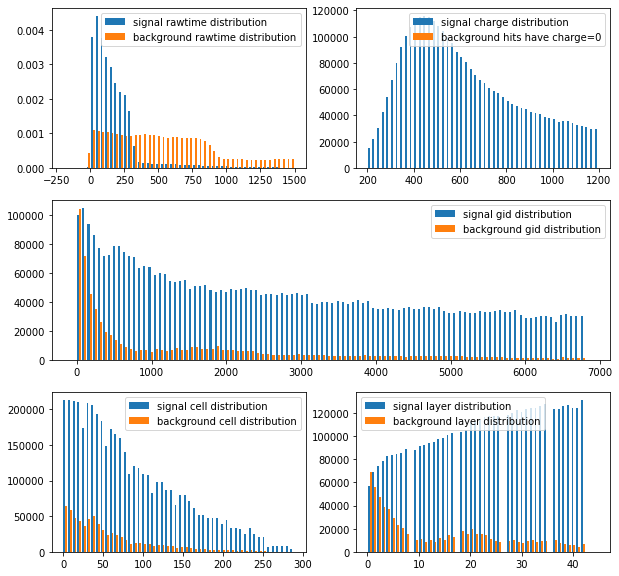

In [ ]:
# Historgram of features
plt.subplots(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.hist([dfsiglow['time'], dfbaclow['time']],\
         bins = 50, range=[-200, 1500],\
         label = ['signal rawtime distribution', 'background rawtime distribution'], density=True)
plt.legend()

plt.subplot(3, 2, 2)
plt.hist([dfsiglow['charge'], dfbaclow['charge']], bins = 50, range=[200, 1200],\
         label = ['signal charge distribution', 'background hits have charge=0'])
plt.legend()

plt.subplot(3, 1, 2)
plt.hist([dfsiglow['gid'], dfbaclow['gid']],\
         bins = 100, range=[0, 6800],\
         label = ['signal gid distribution', 'background gid distribution'])
plt.legend()

plt.subplot(3, 2, 5)
plt.hist([dfsiglow['cell'], dfbaclow['cell']],\
         bins = 50, range=[0, 290],\
         label = ['signal cell distribution', 'background cell distribution'])
plt.legend()

plt.subplot(3, 2, 6)
plt.hist([dfsiglow['layer'], dfbaclow['layer']],\
         bins = 50, range=[0, 45],\
         label = ['signal layer distribution', 'background layer distribution'])
plt.legend()

NameError: ignored

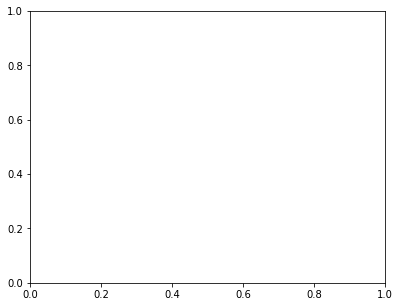

In [ ]:
# Histogram of the features.
import matplotlib.colors as mcolors
from matplotlib import colors
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(14, 5)) #create a canvas, tell matplotlib it's 3"d
ax = fig.add_subplot(121)#, projection='3d')
plt.hist2d(dfsig100['time'].to_numpy(), dfsig100['gid'].to_numpy(), \
                                      bins=(140, 700), range=[[0, 1500], [0, 7000]], \
                                      norm = colors.Normalize(0, 100))#, cmap=plt.cm.YlGnBu)#viridis)
plt.colorbar()
plt.xlabel('time', fontsize=16)
plt.ylabel('gid', fontsize=16)
plt.tick_params(length=6, width=2, labelsize=12)
plt.title('histogram of the signal hits', fontsize=18)

ax2 = fig.add_subplot(122)#, projection='3d')
plt.hist2d(dfbac100['time'].to_numpy(), dfbac100['gid'].to_numpy(), \
                                      bins=(140, 700), range=[[0, 1500], [0, 7000]], \
                                      norm = colors.Normalize(0, 100))#, norm=colors.LogNorm())
plt.colorbar()
plt.xlabel('time', fontsize=16)
plt.ylabel('gid', fontsize=16)
plt.tick_params(length=6, width=2, labelsize=12)
plt.title('histogram of the background hits', fontsize=18)

In [ ]:
dfsig100['angleid'] = anglef(dfsig100['layer'], dfsig100['cell']).astype(np.uint16)
dfbac100['angleid'] = anglef(dfbac100['layer'], dfbac100['cell']).astype(np.uint16)

NameError: ignored

### 3d plots

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

evf = 599
evt = 600                     #all the hits of events from evf to evt are ploted.
hns1 = truestatlow[0:evf].sum()  
hnb1 = hitstatlow[0:evf].sum() - truestatlow[0:evf].sum()
hns2 = truestatlow[0:evt].sum()  
hnb2 = hitstatlow[0:evt].sum() - truestatlow[0:evt].sum()

xs = (7 + dfsiglow['layer'][hns1:hns2]) * np.cos(dfsiglow['angle'][hns1:hns2])
ys = (7 + dfsiglow['layer'][hns1:hns2]) * np.sin(dfsiglow['angle'][hns1:hns2])
zs = dfsiglow['time'][hns1:hns2]

xb = (7 + dfbaclow['layer'][hnb1:hnb2]) * np.cos(dfbaclow['angle'][hnb1:hnb2])
yb = (7 + dfbaclow['layer'][hnb1:hnb2]) * np.sin(dfbaclow['angle'][hnb1:hnb2])
zb = dfbaclow['time'][hnb1:hnb2]

fig = plt.figure(figsize=(12, 12))
ax = plt.gca(projection='3d')
plt.title(F'XY position vs time for hits of {evt-evf} events\n {hns2-hns1} signal hits and {hnb2 - hnb1} background hits')
#ax.grid(False)

def init():
    ax.scatter(xs, ys, zs, s=8, label='signal hits')
    ax.scatter(xb, yb, zb, s=8, label='background hits')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('time')
    plt.xlim(-40, 40)
    plt.ylim(-40, 40)
    plt.legend()
    return fig

def animate(i):
    ax.view_init(-180*int(i/180)+(i%180), i)     #view start from 0 and goes one complete circle
#    ax.view_init(90 * (i > 269) + 90 * (i > 179) - 270 * (i > 89) + (i % 90) + 90, i)  #view starts from 90
    return fig


anim = FuncAnimation(fig, animate, init_func=init, frames=360, interval=15, blit=True)
#anim.save(F'./bhabha-files/featurepics/3dfeature{evt-evf}.gif')

### 2d plot

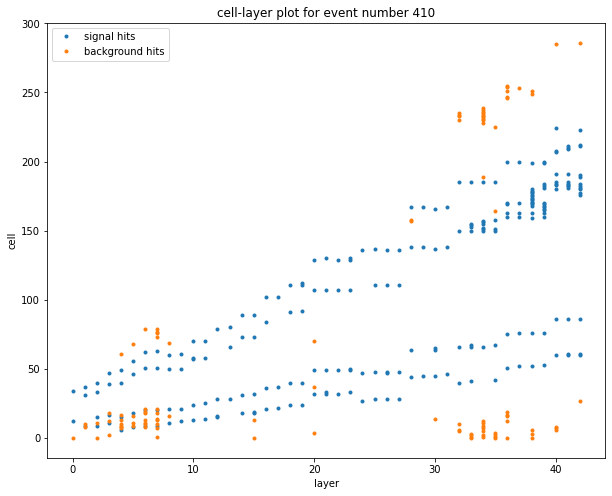

In [ ]:
plt.figure(figsize=(10,8))
evnlc = 410   #event number to be plotted
plt.plot(dfsiglow.loc[dfsiglow.event == evnlc]['layer'], dfsiglow.loc[dfsiglow.event == evnlc]['cell'], '.', label='signal hits')
plt.plot(dfbaclow.loc[dfbaclow.event == evnlc]['layer'], dfbaclow.loc[dfbaclow.event == evnlc]['cell'], '.', label='background hits')
plt.xlabel('layer')
plt.ylabel('cell')
plt.title(F'cell-layer plot for event number {evnlc}')
plt.legend()
plt.show()

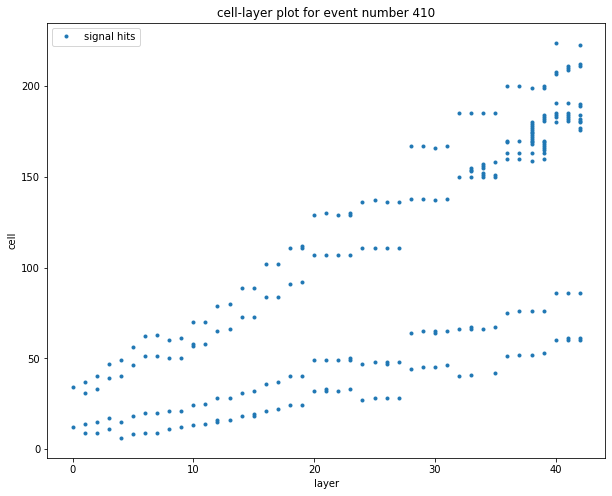

In [ ]:
plt.figure(figsize=(10,8))
evnlc = 410   #event number to be plotted
plt.plot(dfsignonoise.loc[dfsignonoise.event == evnlc]['layer'], dfsignonoise.loc[dfsignonoise.event == evnlc]['cell'], '.', label='signal hits')
plt.xlabel('layer')
plt.ylabel('cell')
plt.title(F'cell-layer plot for event number {evnlc}')
plt.legend()
plt.show()

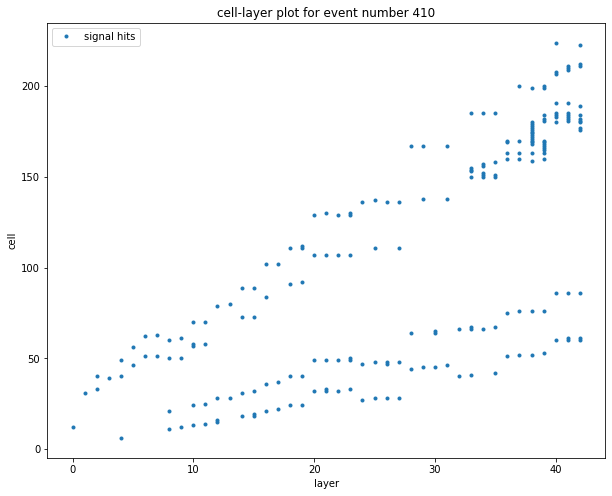

In [ ]:
plt.figure(figsize=(10,8))
evnlc = 410   #event number to be plotted
plt.plot(dfsigalotnoise.loc[dfsigalotnoise.event == evnlc]['layer'], dfsigalotnoise.loc[dfsigalotnoise.event == evnlc]['cell'], '.', label='signal hits')
plt.xlabel('layer')
plt.ylabel('cell')
plt.title(F'cell-layer plot for event number {evnlc}')
plt.legend()
plt.show()

### polar plot

In [ ]:
dfsigbaclow[500:510]

,signum,bacnum,highnoise
event,,,
500,255,23,False
501,354,19,False
502,164,26,False
503,303,16,False
504,181,26,False
505,177,27,False
506,183,26,False
507,225,83,False
508,489,27,False


In [ ]:
dflow['angleid'] = anglef(dflow['layer'], dflow['cell']).astype(np.uint16)
dfsigalotnoise['signum'] = dfsigalotnoise.groupby(['event']).size()
dfbacalotnoise['signum'] = dfbacalotnoise.groupby(['event']).size()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

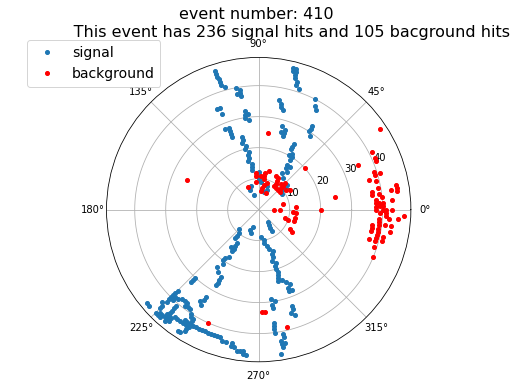

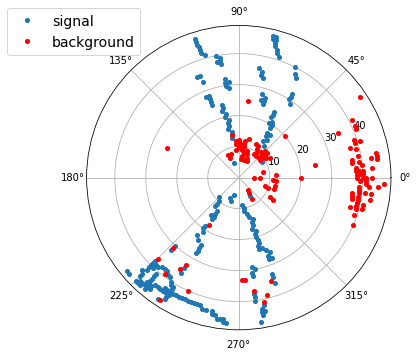

In [ ]:
#evnum = dfhighnoise['event'][6]             #to plot high noise events
evnum = 410
fig = plt.figure(figsize=(12, 8)) 
fig.add_subplot(121, projection='polar')
plt.plot(dfsiglow.loc[dfsiglow.event == evnum]['angle'], 5 + dfsiglow.loc[dfsiglow.event == evnum]['layer'], \
          '.', label = 'signal', markersize=8)
plt.plot(dfbaclow.loc[dfbaclow.event == evnum]['angle'], 5 + dfbaclow.loc[dfbaclow.event == evnum]['layer'], \
          '.', label = 'background', markersize=8, color='red')
signum1 = dfsigbaclow['signum'][evnum]
bacnum1 = dfsigbaclow['bacnum'][evnum]
plt.title(F'event number: {evnum} \n \
            This event has {signum1} signal hits and {bacnum1} bacground hits', fontsize=16)
plt.legend(loc=5, bbox_to_anchor=(0.2, 0.98), fontsize=14)
plt.show()


fig = plt.figure(figsize=(12, 8)) 

fig.add_subplot(122, projection='polar')
plt.plot(dfsigalotnoise.loc[dfsigalotnoise.event == evnum]['angle'], 5 + dfsigalotnoise.loc[dfsigalotnoise.event == evnum]['layer'], \
          '.', label = 'signal', markersize=8)
plt.plot(dfbacalotnoise.loc[dfbacalotnoise.event == evnum]['angle'], 5 + dfbacalotnoise.loc[dfbacalotnoise.event == evnum]['layer'], \
          '.', label = 'background', markersize=8, color='red')
#signum1 = dfsigalotnoise['signum'][evnum]
#bacnum1 = dfbacalotnoise['bacnum'][evnum]
#plt.title(F'event number: {evnum} \n \
#            This event has {dfsigalotnoise} signal hits and {dfsigalotnoise} bacground hits', fontsize=16)
plt.legend(loc=5, bbox_to_anchor=(0.2, 0.98), fontsize=14)
plt.show()

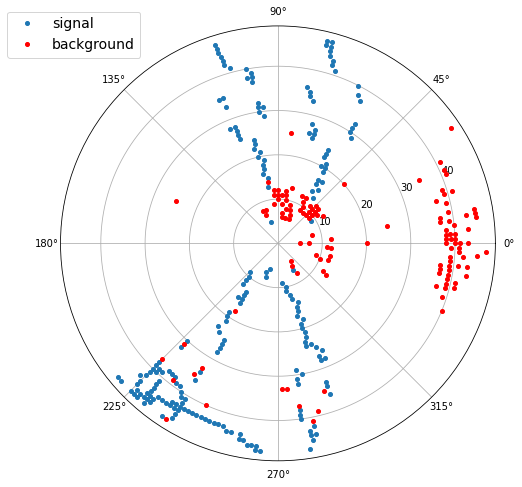

In [ ]:
fig = plt.figure(figsize=(12, 8)) 

fig.add_subplot(111, projection='polar')
plt.plot(dfsigalotnoise.loc[dfsigalotnoise.event == evnum]['angle'], 5 + dfsigalotnoise.loc[dfsigalotnoise.event == evnum]['layer'], \
          '.', label = 'signal', markersize=8)
plt.plot(dfbacalotnoise.loc[dfbacalotnoise.event == evnum]['angle'], 5 + dfbacalotnoise.loc[dfbacalotnoise.event == evnum]['layer'], \
          '.', label = 'background', markersize=8, color='red')
#signum1 = dfsigalotnoise['signum'][evnum]
#bacnum1 = dfbacalotnoise['bacnum'][evnum]
#plt.title(F'event number: {evnum} \n \
#            This event has {dfsigalotnoise} signal hits and {dfsigalotnoise} bacground hits', fontsize=16)
plt.legend(loc=5, bbox_to_anchor=(0.2, 0.98), fontsize=14)
plt.show()

### Cut in time

In [ ]:
dflow

,event,trackId,gid,layer,cell,time,charge,hitid,angleid
251,0,-1000,589,9,29,374.86,0.00,False,15
252,0,-1000,3060,27,120,185.10,0.00,False,27
253,0,-1000,5553,38,133,484.10,0.00,False,20
1,0,7,62,1,22,151.24,502.00,True,20
2,0,7,107,2,23,15.34,578.00,True,19
...,...,...,...,...,...,...,...,...,...
5307474,19999,1009,5483,38,63,135.92,314.00,True,9
5307472,19999,1009,5485,38,65,65.74,400.00,True,10
5307465,19999,1009,5492,38,72,313.91,582.00,True,11
5307430,19999,1009,5540,38,120,79.69,1318.00,True,18


In [ ]:
#percent of signal hits with times less than 300
print(dflow[dflow.time < 1450]['hitid'].sum() / dflow['hitid'].sum())

0.9928062986087522


In [ ]:
#percent of all hits with times less than 300 to true hits
print(len(dflow[dflow.time < 1450]['hitid']) / dflow['hitid'].sum())

1.141551706931026


## data preparation for GNN

In [ ]:
j = 20000
maxtime = 1550
traingnnlow= np.zeros(shape=(j, 6796), dtype=np.float16)
trvalgnnlow= np.zeros(shape=(j, 6796), dtype=np.float16)

for i in range(0, slow[19997]):
    if dfstrarraylow['time'][i] < maxtime:
        traingnnlow[dfstrarraylow['event'][i], dfstrarraylow['gid'][i]] = \
        (500 + dfstrarraylow['time'][i])/(500 + maxtime)
        if dfstrarraylow['hitid'][i] == 1:
            trvalgnnlow[dfstrarraylow['event'][i], dfstrarraylow['gid'][i]] = \
            (500 + dfstrarraylow['time'][i])/(500 + maxtime)

In [ ]:
slow[19997]

5259983

In [ ]:
traingnnlow.shape

(20000, 6796)

In [ ]:
trvalgnnlow

array([[0.    , 0.    , 0.2954, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.274 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.277 , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.2988, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]],
      dtype=float16)

In [ ]:
print((trvalgnnlow[100] > 0).sum())

360


In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/bhabha-files/traincnnpppipi', traingnnlow)
np.save('/content/drive/My Drive/Colab Notebooks/bhabha-files/trvalcnnpppipi', trvalgnnlow)

In [ ]:
# Upload from local drive
import torch
traingnnpppipi = np.load('/content/drive/My Drive/Colab Notebooks/bhabha-files/traincnnpppipi.npy')
trvalgnnpppipi = np.load('/content/drive/My Drive/Colab Notebooks/bhabha-files/trvalcnnpppipi.npy')
print('shape', traingnnpppipi.shape, trvalgnnpppipi.shape)
print('sum', (traingnnpppipi > 0).sum(), (trvalgnnpppipi > 0).sum())

#np.random.shuffle(traingnn80)
#np.random.shuffle(trvalgnn80)

TraTen = torch.tensor(traingnnpppipi, dtype=torch.float)
TrvTen = torch.tensor(trvalgnnpppipi, dtype=torch.float)
print('shape', TraTen.shape, TraTen.shape)

shape (20000, 6796) (20000, 6796)
sum 5232612 4541204
shape torch.Size([20000, 6796]) torch.Size([20000, 6796])


In [ ]:
# prepare events on rectangle to plot
sqevent = np.zeros(shape=(43, 288))
wiresum = np.zeros(shape = 44, dtype=int)
def sitonsquare(event):
    for i in range(43):
        wiresum[i + 1]= np.cumsum(wires)[i]
        w = int(wires[i] / 2)
        for j in range(-w, w):
            sqevent[i, j + 144] = event[(wiresum[i]) + j + w]
    return sqevent

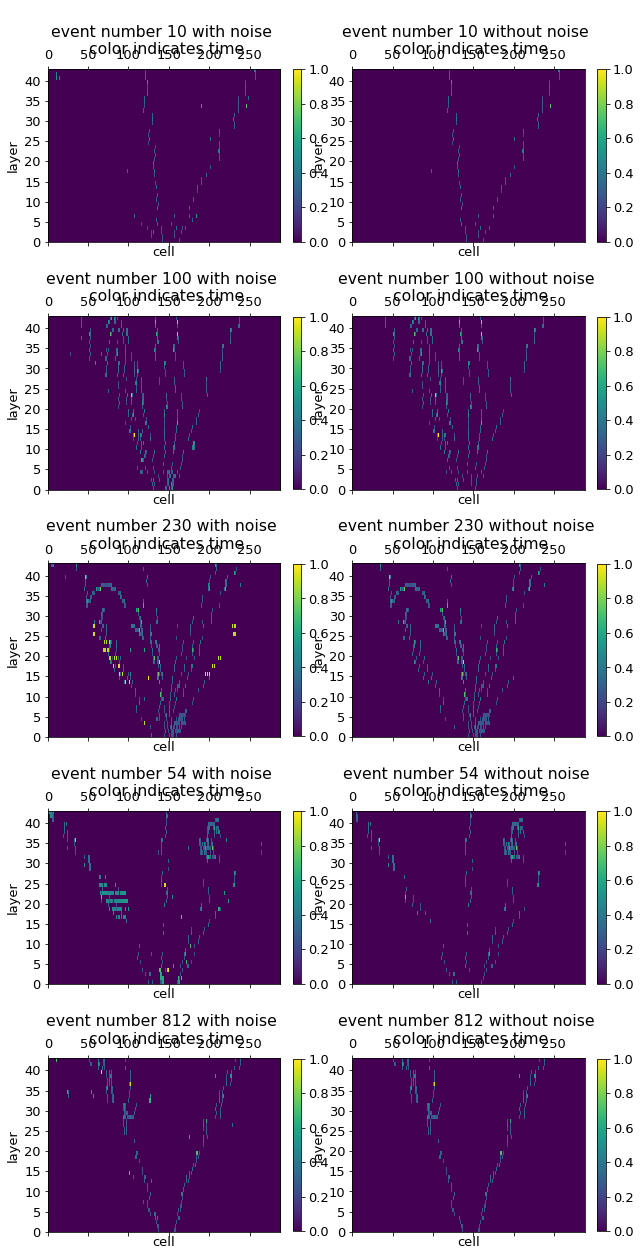

In [ ]:
fig = plt.figure(figsize=(10, 22))
plt.rcParams['font.size'] = '13'
axnum = 1
for evt in (10, 100, 230, 54, 812):
    ax = fig.add_subplot(5, 2, axnum)
    fig.colorbar(ax.matshow(sitonsquare(traingnnlow[evt]), aspect=5, vmin=0, vmax=1, extent=[0, 288, 0, 43], origin='lower')\
                ,fraction=0.034)
    plt.title(f'\nevent number {evt} with noise \n color indicates time')
    plt.xlabel('cell')
    plt.ylabel('layer')
    plt.xlim(0, 288)
    plt.ylim(0, 43)
    ax = fig.add_subplot(5, 2, axnum + 1)
    fig.colorbar(ax.matshow(sitonsquare(trvalgnnlow[evt]), aspect=5, vmin=0, vmax=1, extent=[0, 288, 0, 43], origin='lower')\
                ,fraction=0.034)
    plt.xlabel('cell')
    plt.ylabel('layer')
    plt.xlim(0, 288)
    plt.ylim(0, 43)
    plt.title(f'\nevent number {evt} without noise \n color indicates time')
    axnum = axnum + 2

# Using CNN with pytorch for signal-background separation of bhabha events at BESIII

In [ ]:
 !pip install colabcode

In [ ]:
ColabCode(port=10000, password="1dhtupgphjq3m", mount_drive=True)

In [ ]:
from colabcode import ColabCode

ModuleNotFoundError: ignored

In [ ]:
!pip install jupyterlab pyngrok -q

In [ ]:
!pip install jupyterlab==2.2.9 pyngrok -q


In [ ]:
!nohup jupyter lab --ip=0.0.0.0 &

In [ ]:
!ngrok stop --all

In [ ]:
from pyngrok import ngrok
print(ngrok.connect(8888))

##Preparation

In [ ]:
%reset -f
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import time

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print ("torch version =", torch.__version__, "\ncuda is available:", torch.cuda.is_available())
torch.cuda.empty_cache()

from google.colab import drive
drive.mount('/content/drive')

#model_save_name = 'classifier.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(model.state_dict(), path)
!nvidia-smi

torch version = 1.12.1+cu113 
cuda is available: True
Mounted at /content/drive
Mon Aug 15 13:56:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
        

In [ ]:
!cd drive/MyDrive/Colab_Notebooks/

/bin/bash: line 0: cd: drive/MyDrive/Colab_Notebooks/: No such file or directory


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!dir

Colab\ Notebooks	   PhysRevD.93.065032.pdf
Comprehensive\ Exam	   Seminar;\ IPM;\ 2013;\ NCG\ and\ Physics
Feynman			   Seminar;\ IPM;\ 2013;\ Symmetries\ in\ Physics
General\ Subjects	   Susskind
Gravitational\ Instantons  ارائه\ بدون\ عنوان.gslides
Griffiths		   آموزگاری
Heisenberg		   سخن‌رانی‌ها
Physical\ Constants.pdf    فیزیک


In [ ]:
!ls

'Colab Notebooks'	     PhysRevD.93.065032.pdf
'Comprehensive Exam'	    'Seminar; IPM; 2013; NCG and Physics'
 Feynman		    'Seminar; IPM; 2013; Symmetries in Physics'
'General Subjects'	     Susskind
'Gravitational Instantons'  'ارائه بدون عنوان.gslides'
 Griffiths		     آموزگاری
 Heisenberg		     سخن‌رانی‌ها
'Physical Constants.pdf'     فیزیک


In [ ]:
traingnn10 = np.load('/content/drive/My Drive/Colab Notebooks/bhabha-files/traingnn10.npy')
trvalgnn10 = np.load('/content/drive/My Drive/Colab Notebooks/bhabha-files/trvalgnn10.npy')

traincnn10 = torch.tensor(traingnn10, dtype=torch.float16).to(device)
trvalcnn10 = torch.tensor(trvalgnn10, dtype=torch.float).to(device)


#traingnn10 = np.expand_dims(trainmatrix80d2tnbsmt, axis=3)
#trvalgnn10 = np.expand_dims(trvalmatrix80d2tnbsmt, axis=3)

In [ ]:
 # To change gid to rgid which shows the place of a cell in the 288 by 43 pictures.
from numpy import cumsum

# Wires at each layer
wires = np.array([40, 44, 48, 56, 64, 72, 80, 80, 76, 76, 88, 88, 100, 100, 112, 112, 128, 128, 140, 140, \
                 160, 160, 160, 160, 176, 176, 176, 176, 208, 208, 208, 208, 240, 240, 240, 240, \
                  256, 256, 256, 256, 288, 288, 288])
wiresum = cumsum(wires)

sqevent = np.zeros(shape=(43, 288))
wiresum = np.zeros(shape = 44, dtype=int)
def sitonsquare(event):
    for i in range(43):
        wiresum[i + 1]= cumsum(wires)[i]
        w = int(wires[i] / 2)
        for j in range(-w, w):
            sqevent[i, j + 144] = event[(wiresum[i]) + j + w]
    return sqevent

In [ ]:
x = np.zeros(shape=[10000, 43, 288])
for i in range(0, 10000):
  x[i] = sitonsquare(traincnn10[i])

In [ ]:
x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
x.shape

(10000, 43, 288)

In [ ]:
x = np.zeros(shape=[3000, 43, 288])
for i in range(7000, 10000):
  x[i-7000] = sitonsquare(traincnn10[i])

In [ ]:
  x = torch.tensor(x, dtype=torch.float).to(device)

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/bhabha-files/x.npy', torch.Tensor.cpu(x))

In [ ]:
xx = np.load('/content/drive/My Drive/Colab Notebooks/bhabha-files/x.npy')

In [ ]:
x = torch.tensor(xx[2500:3000], dtype=torch.float).to(device)

In [ ]:
#y = np.zeros(shape=[10000, 43, 288])
#for i in range(0, 10000):
#  y[i] = sitonsquare(trvalcnn10[i])

In [ ]:
traincnn10.shape

torch.Size([10000, 6796])

In [ ]:
x.shape

(1000, 43, 288)

In [ ]:
y = trvalcnn10[0: 10000]
y.shape

torch.Size([10000, 6796])

In [ ]:
type(x)

torch.Tensor

Text(0.5, 1.05, 'event number 230 \n only signal hits')

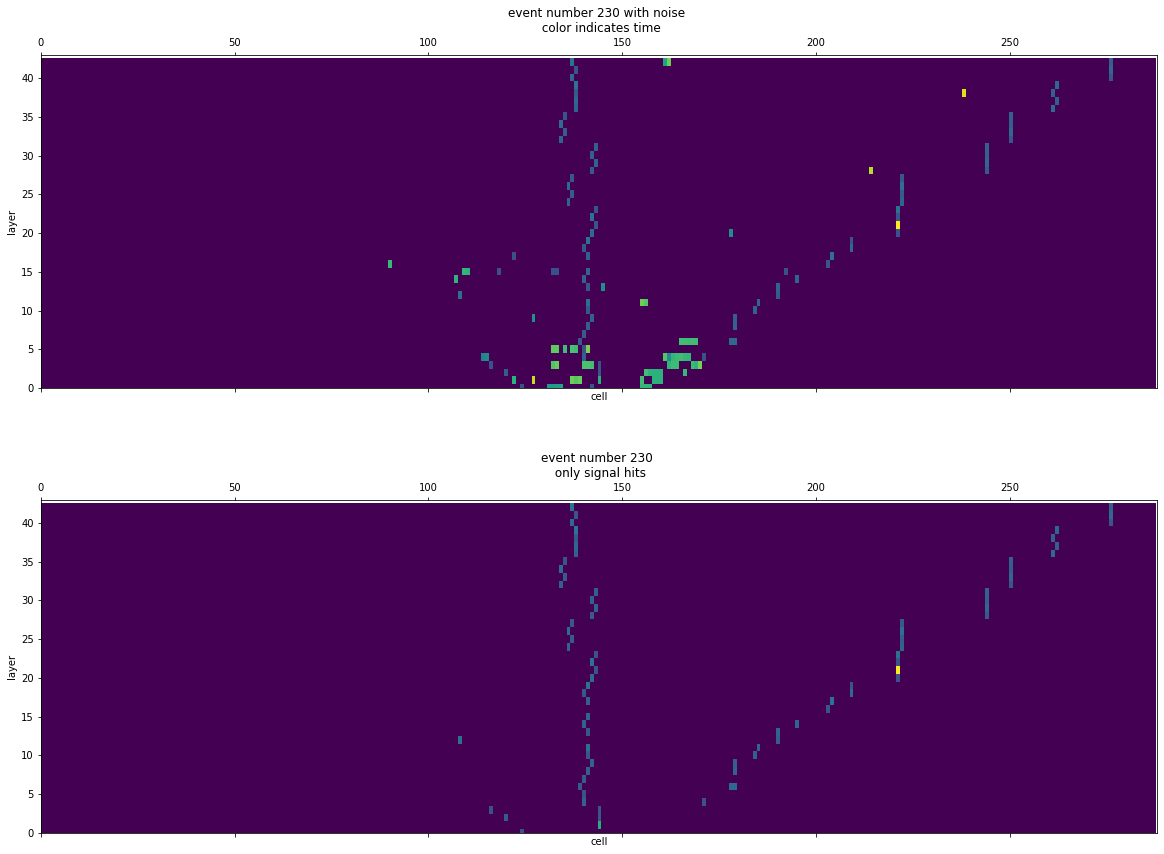

In [ ]:
fig = plt.figure(figsize=(20, 15))
EvNum = 230
ax1 = fig.add_subplot(211)
ax1.matshow(x[EvNum], aspect=2)
plt.xlabel('cell')
plt.ylabel('layer')
plt.xlim(0, 288)
plt.ylim(0, 43)
plt.title(f'event number {EvNum} with noise \n color indicates time')

ax2 = fig.add_subplot(212)
ax2.matshow(sitonsquare(y[EvNum]), aspect=2)
plt.xlabel('cell')
plt.ylabel('layer')
plt.xlim(0, 288)
plt.ylim(0, 43)
plt.title(f'event number {EvNum} \n only signal hits')

Text(0.5, 1.05, 'event number 230 \n only signal hits')

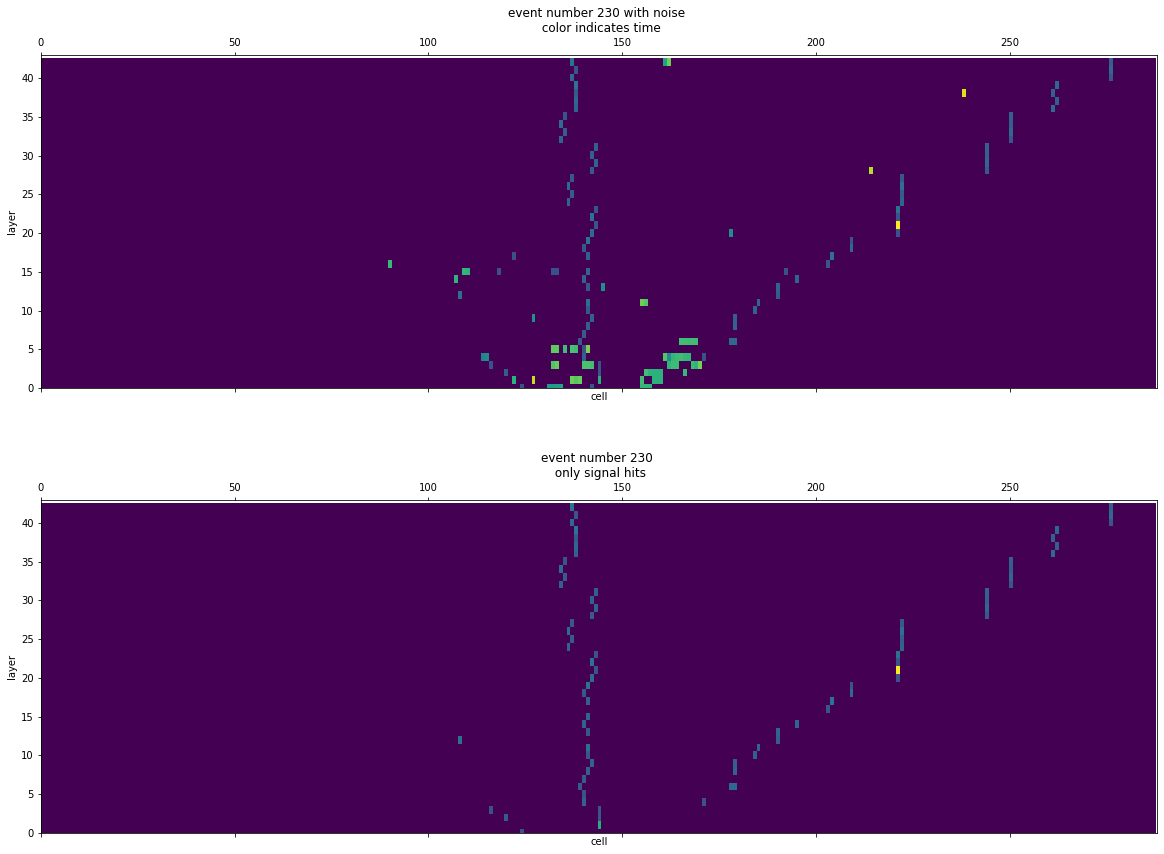

In [ ]:
fig = plt.figure(figsize=(20, 15))
EvNum = 230
ax1 = fig.add_subplot(211)
ax1.matshow(x[EvNum], aspect=2)
plt.xlabel('cell')
plt.ylabel('layer')
plt.xlim(0, 288)
plt.ylim(0, 43)
plt.title(f'event number {EvNum} with noise \n color indicates time')

ax2 = fig.add_subplot(212)
ax2.matshow(y[EvNum], aspect=2)
plt.xlabel('cell')
plt.ylabel('layer')
plt.xlim(0, 288)
plt.ylim(0, 43)
plt.title(f'event number {EvNum} \n only signal hits')

##The model

In [ ]:
modelname = 'pppipicnn10d2tnbsmtre'

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 256, 3, 1)
        self.conv2 = nn.Conv2d(256, 128, 3, 1)
        self.conv3 = nn.Conv2d(128, 64, 3, 1)
        self.fc1 = nn.Linear(667776, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 6796)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.sigmoid(self.fc4(x))
        return x

vars()[modelname] = Net().to(device)
net = vars()[modelname]
print(net)

Net(
  (conv1): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=667776, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=6796, bias=True)
)


In [ ]:
sum(p.numel() for p in net.parameters() if p.requires_grad)

171805196

In [ ]:
sitonsquare(output1[evn]).shape

NameError: ignored

In [ ]:
#Passing some batch of data through the NN before training.
BATCH_SIZE = 20
evn = 2
x1 = (x.reshape(-1,1,43,288)[0:BATCH_SIZE])
y1 = (y[0:BATCH_SIZE]).to(device)
output1 = net(x1)
im1 = sitonsquare(output1[evn])
print(F'event number {evn} after passing from the not-trained network:\n', im1)

figure = plt.figure(figsize=(20, 15)) 
axes = figure.add_subplot(311) 
figure.colorbar(axes.matshow(torch.Tensor.cpu(x1)[evn][0], vmin=0, vmax=0.8, extent=[0, 288, 0, 43], origin='lower')\
                ,fraction=0.01)
plt.xlabel('cell', fontsize=18)
plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title(F'event number {evn} \nwith noise', fontsize=16)

axes = figure.add_subplot(312) 
figure.colorbar(axes.matshow(torch.Tensor.cpu(y1)[evn][0], vmin=0, vmax=0.8, extent=[0, 288, 0, 43], origin='lower')\
                ,fraction=0.01)
plt.xlabel('cell', fontsize=18)
#plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title(F'event number {evn} \nwithout noise', fontsize=16)

axes = figure.add_subplot(313) 
figure.colorbar(axes.matshow(im1, extent=[0, 288, 0, 43], origin='lower')\
                ,fraction=0.01)
plt.xlabel('cell', fontsize=18)
#plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title('passing from the network \nbefore trainning', fontsize=16)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


event number 2 after passing from the not-trained network:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.48361418 0.47185722 0.52346879 ... 0.47152409 0.51473224 0.51212811]
 [0.49015829 0.52843237 0.47105142 ... 0.53177029 0.52490282 0.51459187]
 [0.48881584 0.50646865 0.51541919 ... 0.48528999 0.49038681 0.47948077]]


TypeError: ignored

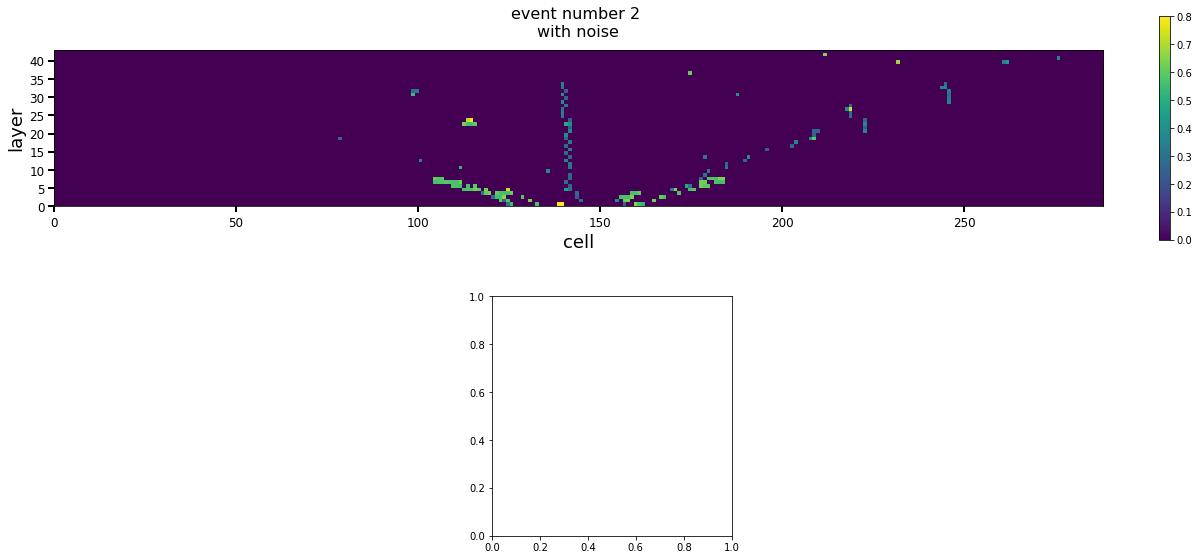

In [ ]:
#Passing some batch of data through the NN before training.
BATCH_SIZE = 20
evn = 2
x1 = (x.reshape(-1,1,43,288)[0:BATCH_SIZE]).to(device)
y1 = y[0:BATCH_SIZE]
output1 = net(x1)
im1 = sitonsquare(output1[evn])
print(F'event number {evn} after passing from the not-trained network:\n', im1)

figure = plt.figure(figsize=(20, 15)) 
axes = figure.add_subplot(311) 
figure.colorbar(axes.matshow(torch.Tensor.cpu(x1)[evn][0], vmin=0, vmax=0.8, extent=[0, 288, 0, 43], origin='lower')\
                ,fraction=0.01)
plt.xlabel('cell', fontsize=18)
plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title(F'event number {evn} \nwith noise', fontsize=16)

axes = figure.add_subplot(312) 
figure.colorbar(axes.matshow(torch.Tensor.cpu(y1)[evn][0], vmin=0, vmax=0.8, extent=[0, 288, 0, 43], origin='lower')\
                ,fraction=0.01)
plt.xlabel('cell', fontsize=18)
#plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title(F'event number {evn} \nwithout noise', fontsize=16)

axes = figure.add_subplot(313) 
figure.colorbar(axes.matshow(im1, extent=[0, 288, 0, 43], origin='lower')\
                ,fraction=0.01)
plt.xlabel('cell', fontsize=18)
#plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title('passing from the network \nbefore trainning', fontsize=16)

In [ ]:
trvalcnn10.shape

(10000, 6796)

In [ ]:
load_model = False
BATCH_SIZE = 20
epoch_num = 15
tra_size = 10000
loss50 = 0
epoch_save = 2

log_dir = "/content/drive/My Drive/Colab Notebooks/bhabha-files/logs/fit/" + modelname #+ time.time()
checkpoint_dir = "/content/drive/My Drive/Colab Notebooks/bhabha-files/" + modelname 

def checkpoint_save(state, epoch):
  print("=> saveing checkpoint at epoch", epoch)
  torch.save(state, F"{checkpoint_dir}/saved_checkpoint.pth.tar")

def checkpoint_load(loadedcheckpoint):
  print("=> loading checkpoint from", F"{checkpoint_dir}/saved_checkpoint.pth.tar")
  net.load_state_dict(loadedcheckpoint['state_dict'])
  optimizer.load_state_dict(loadedcheckpoint['optimizer'])

trainset10d2tnbsmtre = (x[0:10000]).view(10000, 1, 43, 288).to(device)
targetset10d2tnbsmtre = (y)

loss_function = torch.nn.BCELoss()# nn.CrossEntropyLoss() # in tensorflow I have binary_crossentropy, is this the same?
optimizer = optim.Adam(net.parameters(), lr=0.0001)

if load_model:
  checkpoint_load(torch.load(F"{checkpoint_dir}/saved_checkpoint.pth.tar"))

t1 = time.time()
for epoch in range(epoch_num):                # for data in trainset80d2tnbs:    # X, y = data 
  for i in range(int(tra_size/BATCH_SIZE)):
    tra_batch = trainset10d2tnbsmtre[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
    trv_batch = targetset10d2tnbsmtre[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
    net.zero_grad() 
    output = torch.Tensor.cpu(net(tra_batch))#.view(BATCH_SIZE, 1, 43, 40)
    #print(trv_batch.dtype,  output.dtype, output.shape, torch.Tensor.cpu(trv_batch).shape)
    #print(type(torch.Tensor(sitonsquare(output))))
    loss = loss_function(output, torch.Tensor.cpu(trv_batch))
    #loss.requires_grad = True
    #print('loss', loss)
    loss.backward()  
    optimizer.step()
    if i % 500 is not 0:
      loss50 = loss50 + loss
    else:
      print('epoch:', epoch, 'loss:', loss50/500)
      loss50 = 0 
  if (epoch % epoch_save == 0) or epoch == epoch_num - 1: 
    checkpoint = {'state_dict' : net.state_dict(), 'optimizer' : optimizer.state_dict()}
    checkpoint_save(checkpoint, epoch)
  writer.add_scalar(log_dir, loss, BATCH_SIZE)
time.time() - t1

NameError: ignored

In [ ]:
checkpoint_dir = "/content/drive/My Drive/Colab Notebooks/bhabha-files/" + modelname 
net.load_state_dict(torch.load(F"{checkpoint_dir}/saved_checkpoint.pth.tar", map_location=torch.device('cpu'))['state_dict'])

<All keys matched successfully>

In [ ]:
torch.save(net, F"{checkpoint_dir}/{modelname}.pt")

In [ ]:
#adsads = torch.load(F"{checkpoint_dir}/saved_checkpoint.pth.tar", map_location=torch.device('cpu'))
#print(adsads.get('conv2.weight'))

## Results

In [ ]:
#An Example.

x1 = x[0:BATCH_SIZE]
output2 = net(x1)
im2 = torch.Tensor.cpu(sitonsquare(output2[evn]).detach()).numpy()

figure = plt.figure(figsize=(16, 3)) 
axes = figure.add_subplot(141) 
figure.colorbar(axes.matshow(torch.Tensor.cpu(x1)[evn][0], vmin=0, vmax=0.8, extent=[0, 40, 0, 43], origin='lower')\
                ,fraction=0.0485)
plt.xlabel('angleid', fontsize=18)
plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title(F'event number {evn} \nwith noise', fontsize=16)

axes = figure.add_subplot(142) 
figure.colorbar(axes.matshow(torch.Tensor.cpu(y1)[evn][0], vmin=0, vmax=0.8, extent=[0, 40, 0, 43], origin='lower')\
                ,fraction=0.0485)
plt.xlabel('angleid', fontsize=18)
#plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title(F'event number {evn} \nwithout noise', fontsize=16)

axes = figure.add_subplot(143) 
figure.colorbar(axes.matshow(im1, extent=[0, 40, 0, 43], origin='lower')\
                ,fraction=0.0485)
plt.xlabel('angleid', fontsize=18)
#plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title('passing from the network \nbefore trainning', fontsize=16)

axes = figure.add_subplot(144) 
figure.colorbar(axes.matshow(im2, vmin=0, vmax=0.8, extent=[0, 40, 0, 43], origin='lower')\
                ,fraction=0.0485)
plt.xlabel('angleid', fontsize=18)
#plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title('passing from the network\n after trainning', fontsize=16)

NameError: ignored

In [ ]:
x.shape

torch.Size([500, 43, 288])

In [ ]:
trainset10d2tnbsmtre = (x).view(500, 1, 43, 288).to(device)
targetset10d2tnbsmtre = trvalcnn10[9500: 10000]


In [ ]:
#Background removal versus signal reservation 
l = 20
ll = 9500
lll = 10000 - ll
th_array = np.arange(0, 0.02, 0.02/50)

modelname_resarray = np.zeros(shape=(len(th_array), lll, 3))
modelpredict = np.zeros(shape=(len(th_array), lll, 6796))

targetset = torch.Tensor.cpu(targetset10d2tnbsmtre)
truevalue = np.zeros(shape=(len(th_array), lll, 6796))
truevalue = np.repeat((targetset > 0).view(1, lll, 6796), len(th_array), axis=0)

In [ ]:
targetset10d2tnbsmtre.shape

torch.Size([1000, 6796])

In [ ]:
traincnn10[9500:10000].view(500,43*288).shape

RuntimeError: ignored

In [ ]:
net(trainset10d2tnbsmtre[0:20]).shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


torch.Size([20, 6796])

In [ ]:
BATCH_SIZE = 20
for i in range(len(th_array)):
  for j in range(int(25)):
    #"with torch.no_grad():" makes the proccess because there is no nead to calculate grads.
    modelpredict[i, j * BATCH_SIZE:(j+1) * BATCH_SIZE] = torch.Tensor.cpu(net(trainset10d2tnbsmtre \
                                                        [j * BATCH_SIZE:(j+1) * BATCH_SIZE])) \
                                                        > torch.tensor(th_array[i])
  modelpredict[i] = np.logical_and(torch.Tensor.cpu(traincnn10[9500:10000].view(500,6796)) > 0\
                                     , modelpredict[i])

t1 = time.time()
for i in range(int(lll/l)):
  ll = ll + l
  #all correctly predicted signal hits
  modelname_resarray[:, i*l:(i+1)*l, 0] = np.logical_and(modelpredict[:, i*l:i*l+l], \
                                                         truevalue[:, i*l:i*l+l]).sum(axis=2)
  #percent of correct signal hits, efficiency
  modelname_resarray[:, i*l:(i+1)*l, 1] = np.true_divide(modelname_resarray[:, i*l:(i+1)*l, 0], \
                                                         truevalue[:, i*l:i*l+l].sum(axis=2))
  #purity
  modelname_resarray[:, i*l:(i+1)*l, 2] = np.true_divide(modelname_resarray[:, i*l:(i+1)*l, 0], \
                                                         modelpredict[:, i*l:i*l+l].sum(axis=2))
      
np.save('/content/drive/My Drive/Colab_Notebooks/bhabha-files/'+modelname+'_result', modelname_resarray)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


FileNotFoundError: ignored

Text(0.5, 1.0, 'Purity and  efficiency averages vs threshold\n')

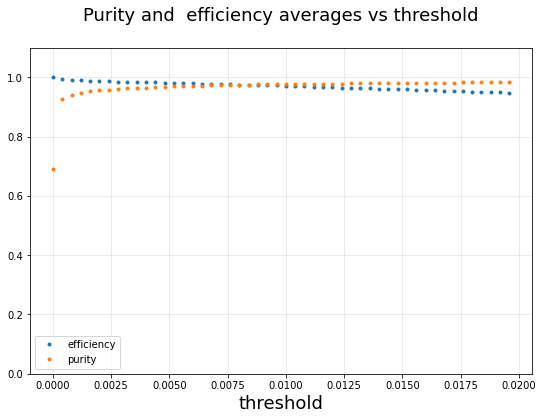

In [ ]:
# Purity and  efficiency vs threshold
plt.subplots(figsize=(9, 6))
plt.plot(th_array, modelname_resarray[:,:,1].mean(axis=1), '.', label='efficiency')
plt.plot(th_array, np.nanmean(modelname_resarray[:,:,2], axis=1), '.', label='purity')
plt.grid(which='both', alpha=0.3)

plt.xlabel('threshold', fontsize = 18)
plt.ylim(0, 1.1)
plt.legend()
plt.title('Purity and  efficiency averages vs threshold\n', fontsize = 18)

Text(0.5, 1.0, 'Purity and  efficiency averages vs threshold\n')

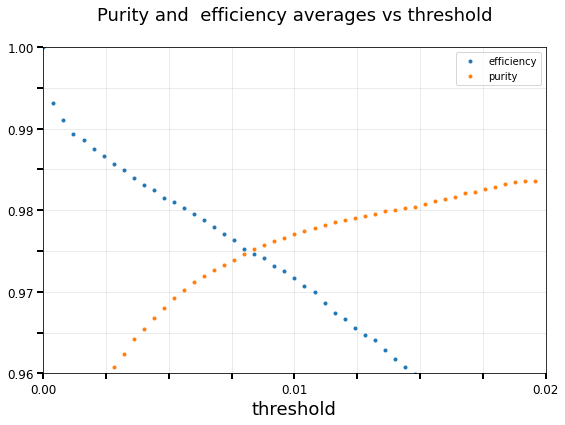

In [ ]:
# Purity and  efficiency vs threshold
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot()#, projection='3d')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.0025))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.005))
ax.tick_params(length=6, width=2, which='both', labelsize=12)

plt.plot(th_array, modelname_resarray[:,:,1].mean(axis=1), '.', label='efficiency')
plt.plot(th_array, modelname_resarray[:,:,2].mean(axis=1), '.', label='purity')
plt.grid(which='both', alpha=0.3)

plt.ylim(0.96, 1)
plt.xlim(0, 0.02)
plt.xlabel('threshold', fontsize = 18)
plt.legend()
plt.title('Purity and  efficiency averages vs threshold\n', fontsize = 18)

In [ ]:
evoi = 6 #event of interest in the test set
print(F"model results for {evoi}th event for 10 thresholds, \ncorrect signal predictions, efficiency, puirity:\n", \
      modelname_resarray[:, evoi][0:10], "\n" \
      F"all signal predictions for 0th to {evoi}th event for 10 thresholds:\n", \
      modelpredict.sum(axis=2)[0:10, 0:evoi], "\n" \
      F"correct number of signal hits per event for the first {evoi}th events:\n", \
      truevalue.sum(axis=2)[0][0:10])

In [ ]:
# Efficiency and purity as threshold functions
# Background removal versus signal reservation.

resarray = np.load('/content/drive/My Drive/Colab_Notebooks/bhabha-files/'+modelname+'_result.npy', \
                   allow_pickle=True)
thnum = 23                    # the index of the chosen value of the bb  threshold array.

plt.subplots(figsize=(15, 7))
plt.subplot(121)            # efficiency vs purity for test events.
plt.plot(resarray[thnum, :, 1], resarray[thnum, :, 2], 'b.')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('efficiency', fontsize = 18)
plt.ylabel('purity', fontsize = 18)
plt.title(F'efficiency and purity for {lll} test events\n', fontsize = 18)

plt.subplot(122)            # efficiency vs purity for test events.
plt.plot(resarray[thnum, :, 1], resarray[thnum, :, 2], 'b.')
plt.xlim(0.85, 1)
plt.ylim(0.85, 1)
plt.xlabel('efficiency', fontsize = 18)
plt.ylabel('purity', fontsize = 18)
plt.title(F'efficiency and purity for {lll} test events\n', fontsize = 18)

#    print(f'\nsignal reservation average: {resarray[:, 2].mean().round(2)}' \
#          f'\nbackgrond removal average: {np.nanmean(resarray[:, 3]).round(3)}')
print('\nefficiency average:', np.nanmean(resarray[thnum, :, 1]).round(3), \
      '\npurity average:', np.nanmean(resarray[thnum, :, 2]).round(3),'\n')    

In [ ]:
8#import matplotlib.colors as mcolors
from matplotlib import colors
#from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(10.5,10)) #create a canvas, tell matplotlib it's 3"d
ax = fig.add_subplot(111)#, projection='3d')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.tick_params(length=6, width=2, which='major', labelsize=12)

plt.hist2d(resarray[thnum, :, 1], resarray[thnum, :, 2], \
                                      bins=(20, 20), range=[[0.805, 1.005], [0.805, 1.005]], \
                                      norm = colors.LogNorm(vmin=1), cmap=plt.cm.Purples)#viridis)
plt.xlabel('efficiency', fontsize=16)
plt.ylabel('purity', fontsize=16)
plt.title('\nhistogram of the efficiency and purity\nof the predictions for 3000 events\n', fontsize=18)
plt.grid(which='both', alpha=0.3)

plt.colorbar(cax=make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1))

In [ ]:
#histogram of the product of purity and efficiency
plt.figure()
prodhist = plt.hist(resarray[thnum, :, 2] * resarray[thnum, :, 1], bins=100, range=[0.96, 1])

In [ ]:
modelname = 'bhabackcnn80d2tnbsmt'
resarray = np.load('/content/drive/My Drive/Colab_Notebooks/bhabha-files/'+modelname+'_result.npy', \
                   allow_pickle=True)
thnum = 23                    # the index of the chosen value of the bb  threshold array.


print('number of events, out of 3000 testing events, with ...\n')
print('the efficiency more than 0.99:\n', \
      (resarray[thnum, :, 1] > 0.99).sum())
print('the purity more than 0.99:\n', \
      (resarray[thnum, :, 2] > 0.99).sum())

efpuor100 = (resarray[thnum, :, 2] == 1) | (resarray[thnum, :, 1] == 1)
print('100% efficiency or 100% purity:\n', efpuor100.sum())

efpua100 = (resarray[thnum, :, 2] == 1) & (resarray[thnum, :, 1] == 1)
print('100% efficiency and purity:\n', efpua100.sum())

efpuor9899 = ((0.98 < resarray[thnum, :, 2]) & (0.98 < resarray[thnum, :, 1])) \
              ^ ((0.99 < resarray[thnum, :, 2]) & (0.99 < resarray[thnum, :, 1]))
print('efficiency and purity both more than 0.98 and less than 0.99:\n', efpuor9899.sum())

efpuor9798 = ((0.97 < resarray[thnum, :, 2]) & (0.97 < resarray[thnum, :, 1])) \
              & ((0.98 > resarray[thnum, :, 2]) | (0.98 > resarray[thnum, :, 1]))
print('efficiency and purity both more than 0.97 and less than 0.98:\n', efpuor9798.sum())

efpuor9697 = ((0.96 < resarray[thnum, :, 2]) & (0.96 < resarray[thnum, :, 1])) \
              & ((0.97 > resarray[thnum, :, 2]) | (0.97 > resarray[thnum, :, 1]))
print('efficiency and purity both more than 0.96 and less than 0.97:\n', efpuor9697.sum())

efpuor96 = (resarray[thnum, :, 2] < 0.96) | (resarray[thnum, :, 1] < 0.96)
print('the efficiency or purity more than 0.96:\n', efpuor96.sum())

'''efpuor97 = (resarray[thnum, :, 2] < 0.97) | (resarray[thnum, :, 1] < 0.97)
print('the efficiency or purity less than 0.97:\n', efpuor97.sum())
efpuor97 = (resarray[thnum, :, 2] < 0.97) | (resarray[thnum, :, 1] < 0.97)
print('the efficiency or purity less than 0.97:\n', efpuor97.sum())

efpuor98 = (resarray[thnum, :, 2] < 0.98) | (resarray[thnum, :, 1] < 0.98)
print('the efficiency or purity less than 0.98:\n', efpuor98.sum())

efpuor99 = (resarray[thnum, :, 2] < 0.99) | (resarray[thnum, :, 1] < 0.99)
print('the efficiency or purity less than 0.99:\n', efpuor99.sum())

efpua99 = (resarray[thnum, :, 2] < 0.99) & (resarray[thnum, :, 1] < 0.99)
print('the efficiency and purity less than 0.99:\n', efpua99.sum())'''


In [ ]:
type((0.98 < resarray[thnum, :, 2]) & (0.98 < resarray[thnum, :, 1]) )

In [ ]:
efpuor100 = np.where(efpuor100)[0] + 77000
efpua100 = np.where(efpua100)[0] + 77000
efpuor9899 = np.where(efpuor9899)[0] + 77000
efpuor9798 = np.where(efpuor9798)[0] + 77000
efpuor9697 = np.where(efpuor9697)[0] + 77000
efpuor96 = np.where(efpuor96)[0] + 77000
'''efpuor97 = np.where(efpuor97)[0] + 77000
efpuor98 = np.where(efpuor98)[0] + 77000
efpuor99 = np.where(efpuor99)[0] + 77000
efpua99 = np.where(efpua99)[0] + 77000'''

In [ ]:
truestat80 = np.load('/content/drive/My Drive/Colab_Notebooks/bhabha-files/truestat80.npy', allow_pickle=True)
hitstat80 = np.load('/content/drive/My Drive/Colab_Notebooks/bhabha-files/hitstat80.npy', allow_pickle=True)

In [ ]:
maxnhit = 100
alphav = 1
binnum = 100
maxhit = 100

plt.subplots(figsize=(10, 10))
plt.hist(hitstat80 - truestat80, alpha=alphav, bins=binnum, density=True, \
         range=(0, maxhit), histtype='step', label='all the events')
plt.xlim(0, maxnhit)

plt.hist(hitstat80[efpua100] - truestat80[efpua100], alpha=alphav, bins=binnum, density=True, \
         range=(0, maxhit), histtype='step', label='eff and p 100%')
plt.xlim(0, maxnhit)

plt.hist(hitstat80[efpuor9899] - truestat80[efpuor9899], alpha=alphav, bins=binnum, density=True, \
         range=(0, maxhit), histtype='step', label='98-99')
plt.xlim(0, maxnhit)

plt.hist(hitstat80[efpuor9798] - truestat80[efpuor9798], alpha=alphav, bins=binnum, density=True, \
         range=(0, maxhit), histtype='step', label='97-98')
plt.xlim(0, maxnhit)

plt.hist(hitstat80[efpuor9697] - truestat80[efpuor9697], alpha=alphav, bins=binnum, density=True, \
         range=(0, maxhit), histtype='step', label='96-97')
plt.xlim(0, maxnhit)

plt.hist(hitstat80[efpuor96] - truestat80[efpuor96], alpha=alphav, bins=binnum, density=True, \
         range=(0, maxhit), histtype='step', label='less than 96')
plt.xlim(0, maxnhit)
plt.legend()

In [ ]:
maxnhit = 100
alphav = 1
binnum = 20

plt.subplots(figsize=(10, 10))
ewewewew = plt.hist(hitstat80 - truestat80, alpha=alphav, bins=binnum, range=(0, 100),\
         histtype='step', label='all the events')
plt.xlim(0, maxnhit)


In [ ]:
ewewewew

In [ ]:
maxnhit = 100
alphav = 1
plt.subplots(figsize=(5, 10))
plt.subplot(421)
plt.hist(hitstat80 - truestat80, alpha=1, bins=50, density=True, \
         histtype='step', label='all the events')
plt.xlim(0, maxnhit)

plt.subplot(423)
plt.hist(hitstat80[efpuor100] - truestat80[efpuor100], alpha=alphav, bins=50, density=True, \
         histtype='step', label='eff or p 100%')
plt.xlim(0, maxnhit)

plt.subplot(425)
plt.hist(hitstat80[efpua100] - truestat80[efpua100], alpha=alphav, bins=50, density=True, \
         histtype='step', label='eff and p 100%')
plt.xlim(0, maxnhit)

plt.subplot(427)
plt.hist(hitstat80[efpuor97] - truestat80[efpuor97], alpha=alphav, bins=50, density=True, \
         histtype='step', label='eff or p less than 97%')
plt.xlim(0, maxnhit)

plt.subplot(422)
plt.hist(hitstat80 - truestat80, alpha=1, bins=50, density=True, \
         histtype='step', label='all the events')
plt.xlim(0, maxnhit)

plt.subplot(424)
plt.hist(hitstat80[efpuor98] - truestat80[efpuor98], alpha=alphav, bins=50, density=True, \
         histtype='step', label='eff or p less than 98%')
plt.xlim(0, maxnhit)

plt.subplot(426)
plt.hist(hitstat80[efpuor99] - truestat80[efpuor99], alpha=alphav, bins=50, density=True, \
         histtype='step', label='eff or p less than 99%')
plt.xlim(0, maxnhit)

plt.subplot(428)
plt.hist(hitstat80[efpua99] - truestat80[efpua99], alpha=alphav, bins=50, density=True, \
         histtype='step', label='eff and p less than 99%')
plt.xlim(0, maxnhit)
plt.legend()

In [ ]:
modelname = 'bhabackcnn80d2tnbsmt'
resarray = np.load('/content/drive/My Drive/Colab_Notebooks/bhabha-files/'+modelname+'_result.npy', \
                   allow_pickle=True)

In [ ]:
pjev = np.array([  10,   23,   29,   64,   80,  120,  145,  166,  172,  223,  252,
		        254,  263,  288,  310,  318,  332,  351,  377,  389,  417,  457,
		        497,  515,  540,  559,  561,  604,  629,  654,  659,  716,  718,
		        797,  832,  985,  995, 1040, 1104, 1195, 1216, 1256, 1295, 1305,
		       1323, 1333, 1367, 1530, 1766, 1773, 1817, 1955, 1969, 2029, 2233,
		       2316, 2407, 2413, 2423, 2440, 2595, 2602, 2646, 2726, 2741, 2816,
		       2817, 2859, 2960])

In [ ]:
#poorly judged events

figure = plt.figure(figsize=(16, 3)) 
axes = figure.add_subplot(141) 
figure.colorbar(axes.matshow(torch.Tensor.cpu(x1)[evn][0], vmin=0, vmax=0.8, extent=[0, 40, 0, 43], origin='lower')\
                ,fraction=0.0485)
plt.xlabel('angleid', fontsize=18)
plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title(F'event number {evn} \nwith noise', fontsize=16)

axes = figure.add_subplot(142) 
figure.colorbar(axes.matshow(torch.Tensor.cpu(y1)[evn][0], vmin=0, vmax=0.8, extent=[0, 40, 0, 43], origin='lower')\
                ,fraction=0.0485)
plt.xlabel('angleid', fontsize=18)
#plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title(F'event number {evn} \nwithout noise', fontsize=16)

axes = figure.add_subplot(143) 
figure.colorbar(axes.matshow(im1, extent=[0, 40, 0, 43], origin='lower')\
                ,fraction=0.0485)
plt.xlabel('angleid', fontsize=18)
#plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title('passing from the network \nbefore trainning', fontsize=16)

axes = figure.add_subplot(144) 
figure.colorbar(axes.matshow(im2, vmin=0, vmax=0.8, extent=[0, 40, 0, 43], origin='lower')\
                ,fraction=0.0485)
plt.xlabel('angleid', fontsize=18)
#plt.ylabel('layer', fontsize=18)
plt.tick_params(length=6, width=2, labelsize=12, labelbottom=True, labeltop=False, top=False)
plt.title('passing from the network\n after trainning', fontsize=16)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

In [ ]:
#tensorboard --logdir logs/fit --bind_all
#%tensorboard --logdir=run
!tensorboard dev upload \
  --logdir runs \
  --name "Bhabha_CNN" \
  --description "CNN" \
  --one_shot

## Some examples of how the network detects signal and how we can use the prediction to remove background noise.

In [ ]:
checkpoint_dir = "/content/drive/My Drive/Colab_Notebooks/bhabha-files/" + modelname 
def checkpoint_load(loadedcheckpoint):
  print("=> loading checkpoint from", F"{checkpoint_dir}/saved_checkpoint.pth.tar")
  net.load_state_dict(loadedcheckpoint['state_dict'])
  optimizer.load_state_dict(loadedcheckpoint['optimizer'])
  
checkpoint_load(torch.load(F"{checkpoint_dir}/saved_checkpoint.pth.tar"))

th = 0.02

for event_num in [2, 5, 8, 11, 14, 17, 19]:
  plt.figure(figsize=(17,7))
  plt.subplot(141)
  evwno = torch.Tensor.cpu(tra_batch.view(BATCH_SIZE, 43, 40)[event_num].detach()).numpy()
  plt.imshow(evwno)
  plt.title("event with noise")
  plt.xlabel('layer')
  plt.ylabel('phi')
  plt.subplot(142)
  evwono = torch.Tensor.cpu(trv_batch[event_num].detach()).numpy().reshape(43,40)
  plt.imshow(evwono)
  plt.title("event without noise")
  plt.xlabel('layer')
  plt.ylabel('phi')
  plt.subplot(144)
  cnou = torch.Tensor.cpu(output[event_num].view(43,40).detach()).numpy()
  plt.imshow(cnou)
  plt.title("CNN output")
  plt.xlabel('layer')
  plt.ylabel('phi')
  plt.subplot(143)
  plt.imshow(np.logical_and(evwno, cnou > th))
  plt.title("intersection of the\n CNN outcome with its input")
  plt.xlabel('layer')
  plt.ylabel('phi')

## draft

In [ ]:
writer.add_scalar(tag, scalar_value, global_step=None, walltime=None)
writer.add_histogram(tag, values, global_step=None, bins='tensorflow', walltime=None, max_bins=None)
writer.add_image(tag, img_tensor, global_step=None, walltime=None, dataformats='CHW')
writer.add_figure(tag, figure, global_step=None, close=True, walltime=None)
writer.add_video(tag, vid_tensor, global_step=None, fps=4, walltime=None)
writer.add_audio(tag, snd_tensor, global_step=None, sample_rate=44100, walltime=None)
writer.add_text(tag, text_string, global_step=None, walltime=None)
writer.add_graph(model, input_to_model=None, verbose=False)
writer.add_embedding(mat, metadata=None, label_img=None, global_step=None, tag='default', metadata_header=None)
writer.add_pr_curve(tag, labels, predictions, global_step=None, num_thresholds=127, weights=None, walltime=None)
writer.add_mesh(tag, vertices, colors=None, faces=None, config_dict=None, global_step=None, walltime=None)
writer.add_hparams(hparam_dict=None, metric_dict=None)
hyperparameter tunning
%tensorboard --logdir logs/fit
!tensorboard dev upload \
  --logdir logs/fit \
  --name "(optional) My latest experiment" \
  --description "(optional) Simple comparison of several hyperparameters" \
  --one_shot